# UNIV*6080 Major Project by Pramit Dutta

## Table of Contents

- Section-01: Introduction
- Section-02: Get the Dataset
- Section-03: Data Preprocessing and Evaluation Process Setup
- Section-04: Maximum Likelihood Estimation (MLE)
  - Section-4.1: MLE Implementation Using Synthetic Data
  - Section-4.2: Analysis on House Price Dataset
  - Section-4.3: Exploring Underfit to Overfit - The Spectrum and Optimal Fit
- Section-05: Maximum A Posteriori Estimation (MAP)
  - Section-5.1: MAP Implementation Using Synthetic Data
  - Section-5.2: Analysis on House Price Dataset
  - Section-5.3: Comparison Between MLE and MAP
- Section-06: Bayesian Linear Regression
  - Section-6.1: BLR Implementation Using Synthetic Data
  - Section-6.2: Analysis on House Price Dataset
  - Section-6.3: Result Analysis of MLE, MAP and BLR
- Section-07: Classification using Regression: Logistic Regression
  - Section-7.1: Titanic - Predict survival on the Titanic
  - Section-7.2: Data Preprocessing
  - Section-7.3: Model Setup and Prediction
  - Section-7.4: Model Evaluation and Performance Analysis
- Section-08: Conclusion
- Reference

##Section-01: Introduction

**Motivation:** Nowadays, most of the decision driven approaches are based on data interpretation and insights. It is crucial in almost every field- from making investment in certain projects to improving healthcare system. As the amount of data is increasing, it is becoming more and more important to understand and find the patterns in data and their interactions. Linear Regression, a statistical modeling technique, can prove vital in this context.

The basic aim of regression is to find patterns in data and to estimate the parameters of the data distribution and their relationships. By fitting a model to the data, Linear Regression allows us to quantify the impact of changes in an independent variable on a dependent variable. This simple as well as powerful approach not only give us interpretation of data both intuitive and computationally efficient way but also one of the most efficient tools used for predictive analysis providing insights that support data-driven decision-making across diverse applications.

**Organization of the Project:** To explore the allies of regression, this project follows a systematic and structured approach. It is divided into multiple sections, each focusing on specific techniques and their applications. Every section begins with a mathematical foundation to build intuition about the methods and models. Subsequently, the theoretical insights are translated into code implementations to observe their practical application. Finally, each technique is applied to real-world examples for training and testing.

The project starts by acquiring and preprocessing a dataset to maintain consistency throughout all analyses. The dataset serves as the foundation for exploring topics such as Maximum Likelihood Estimation (MLE), Maximum A Posteriori Estimation (MAP), and Bayesian Linear Regression (BLR). In addition, the project dives into the classification application using regression techniques, such as Logistic Regression using titanic survival prediction dataset.

Now, we will import the necessary libraries to perform data processing, visualization, and model building. These libraries will help us handle every step of the project efficiently, from preprocessing to evaluation.

In [ ]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, SGDRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import make_pipeline
from IPython.display import Image, display
from scipy.optimize import minimize
from scipy.interpolate import make_interp_spline

## Section-02: Get the Dataset <a id="section-02"></a>



In this project, to implement our theoritical knowledge to real world problem, the House Price dataset [1] is used. In this step, the dataset is downloaded using !wget. The dataset contains different attributes of a house and the price. The objective of the project will be using different models to predict the price of house using the attributes. The dataset has the attributes as:

crim: Per capita crime rate by town.

zn: Proportion of large residential lots (over 25,000 sq. ft.).

indus: Proportion of non-retail business acres per town.

Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).

nox: Concentration of nitrogen oxides in the air.

rm: Average number of rooms per dwelling.

age: Proportion of old owner-occupied units built before 1940.

dis: Weighted distances to Boston employment centers.

rad: Index of accessibility to radial highways.

tax: Property tax rate per $10,000.
ptratio: This stands for "pupil-teacher ratio by town," indicating the number of students per teacher in the area, which can reflect the quality of local education.

b: proportion of Black residents in a town.

lstat: lower status of the population

ptratio: pupil-teacher ratio by town

**The price of the house is under the name of medv which is our target variable.**

In [ ]:
!wget "#Dataset Path" -O House_Price_Dataset.csv

--2024-11-24 15:21:50--  https://docs.google.com/uc?export=download&id=17Za8hgUSDsa7J3k4FCet_Kw9o_B3w48e
Resolving docs.google.com (docs.google.com)... 172.253.115.102, 172.253.115.101, 172.253.115.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.115.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=17Za8hgUSDsa7J3k4FCet_Kw9o_B3w48e&export=download [following]
--2024-11-24 15:21:50--  https://drive.usercontent.google.com/download?id=17Za8hgUSDsa7J3k4FCet_Kw9o_B3w48e&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.167.132, 2607:f8b0:4004:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.167.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35177 (34K) [application/octet-stream]
Saving to: ‘House_Price_Dataset.csv’

House_Price_Dataset 100%[===================>]  34.35K  -

##Section-03: Data Preprocessing and Evaluation Process Setup

First, we will load thedatset and convert it to a dataframe format using pandas [2]. Then,to handle missing data, we will drop the rows that contains missing values. While there are often more efficient ways to address missing data, in this case, we simply dropped these entries since only 5 rows are affected.

In [ ]:
# Load the dataset
data = pd.read_csv('/content/House_Price_Dataset.csv')

# Missing Value
print(data.isnull().sum().sum())

# Drop missing values directly without reassigning
data.dropna(inplace=True)

# Check the first few rows of the data
data.head()

5


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Now, we need to select the features and target variables. Generally, using domain knowledge can help identify which parameters are most likely to improve model performance. However, in this project, our primary objective is not to build a highly robust model but to develop an understanding of the concept of linear regression.

That being said one of the collumn (proportion of Black residents in a town) of the dataset was dropped as using such feature is racially insensitive and can lead to a racial bias [3].

In [ ]:
# Set appropiate columns as features X
X = data.drop(['b'], axis=1) #This parameter can create racial bias
X = data.drop(['medv'], axis=1) #Target Variable

# Set Rent as the target variable y
y = data['medv']

#print(X)
#print(y)

Now, let's split the dataset into train and test set using a 80%-20% split. This ensures that 80% of the data is used to train the model, while 20% is reserved for testing its performance. The random_state=42 is used to keep the spliting consistent; allowing reproducibility of results every time the code is run.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To avoid any unstability in the datset, we will now normalize our dataset. In the normalization process, our datapoint will be scaled between 0~1, preserving the proportional relationship between the datapoints. This allows the model to learn the correlation of datapoint without  being overwhelmed by the raw value of the data [4].

In [ ]:
# Initialize scalers for X and y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Normalize X_train and X_test
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)

# Normalize y_train and y_test
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler_y.transform(y_test.values.reshape(-1, 1))


As we have processed our dataset, now let's develop the evaluation process of our model. For that purpose, we will use mean squared error(MSE) and R-squared score where MSE measures the average squared difference between predicted and actual values, indicating model accuracy. On the other hand, R-squared score represents the proportion of variance explained by the model, with values closer to 1 indicating a better fit.

In [ ]:
def print_metrics(y_true, y_pred, approach):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{approach} Mean Squared Error: {mse:.4f}, R^2 Score: {r2:.4f}")

##Section-04: Maximum Likelihood Estimation (MLE)

Suppose, a dataset has n points as ($x_1$, $y_1$), ($x_2$, $y_3$),...,($x_n$, $y_n$). Then we can assume for each $y_i$ generated from a normal distribution centered around a linear function of $x_i$:

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$
where:

$\beta_0 $ = The intercept and $\beta_1 $ = The slope [parameter to estimate]

$\epsilon_i$= Represent random error

Maximum Likelihood Estimation is a regression technique where we maximize our likelihood by selecting parameter where likelihood means making the observed data most probable under a soecific model [5].

The likelihood function $L(\beta_0 , \beta_1, \sigma^2)$ can be defined by the product of the individual probabilities by  observing all n points.From the gaussian distribution the probability distribution function for each $y_i$ is:

$$f(y_i \mid x_i, \beta_0, \beta_1, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(y_i - (\beta_0 + \beta_1 x_i))^2}{2 \sigma^2}\right)$$

The likehood function is the probabilities for all n observations, assuming they are independent and identically distributed. It can be expressed as follow:
$$L(\beta_0, \beta_1, \sigma^2) = \prod_{i=1}^{n} f(y_i\mid x_i, \beta_0, \beta_1, \sigma^2)$$

This function is basically the probability of observing $y_i$ given the parameter $\beta_0 $, $\beta_1 $ and $\sigma^2$. Let's  substitute PDF $f(y_i\mid x_i, \beta_0, \beta_1, \sigma^2)$ in the likelihood function we can get:

$$L(\beta_0, \beta_1, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^2}} \exp(-\frac{(y_i - (\beta_0 + \beta_1 x_i))^2}{2 \sigma^2}$$

The goal of MLE is to find such value of parameter that maximizes the likelihood function. Instead of maximizing likelihood $L(\beta_0, \beta_1, \sigma^2)$, we often maximize the log-likelihood $\ln L$ as it transforms the product into a sum and simplifies computations:

$$\ln L(\beta_0, \beta_1, \sigma^2) = \sum_{i=1}^n \ln\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) + \sum_{i=1}^n \ln \exp(-\frac{(y_i - (\beta_0 + \beta_1 x_i))^2}{2\sigma^2})$$

This can be simplified to:

$$\ln L(\beta_0, \beta_1, \sigma^2) = \ln\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \frac{1}{2\sigma^2}\sum_{i=1}^n(y_i - (\beta_0 + \beta_1 x_i))^2$$

We can also consider minimizing the negative log-likelihood as maximizing our log-likehood $\ln L$ or maximizing our likelihood function. As $\sigma^2$ is constant the goal of MLE can be defined as:

$$\min_{\beta_0, \beta_1} -\ln L(\beta_0, \beta_1, \sigma^2)$$

Ignoring constants like $\ln (\frac{1}{\sqrt{2\pi\sigma^2}})$ and $\frac{1}{2\sigma^2}$, we can define the objective function as:

$$\min_{\beta_0, \beta_1} \sum_{i=1}^{n} \left( y_i - (\beta_0 + \beta_1 x_i) \right)^2$$

Maximum Likelihood Estimation is the approach of optimizing parameters using the objective function that make the observed data closely approximate under the specified model.

###Section-4.1: MLE Implementation Using Synthetic Data





In this setup we generate random data for a simple relationship $b=\beta_0+\beta_1 \cdot a +noise$ where a is the independent variable and b is the dependent variable. The true values for the intercept $(\beta_0)$ and slope $(\beta_1)$ are set to 3.0 and 2.0, respectively. Random noise is added to b, drawn from a normal distribution with a mean of 0 and a standard deviation of 1, to simulate real-world variability. The independent variable a is one-dimensional, making this a simple linear relationship. A fixed random seed (
np.random.seed(42)) is used to ensure reproducibility of the results. The goal of Maximum Likelihood Estimation (MLE) is to estimate $\beta_0$ and $\beta_1$ so that the value of the model closely approximate the data distribution.

In [ ]:
# Generate random data for a linear relationship b = beta0 + beta1*a + noise
np.random.seed(42)
n = 50  # number of data points
beta0_true = 3.0  # true intercept
beta1_true = 2.0  # true slope
a = np.linspace(0, 10, n)  # independent variable
noise = np.random.normal(0, 1, n)  # random noise
b = beta0_true + beta1_true * a + noise  # dependent variable

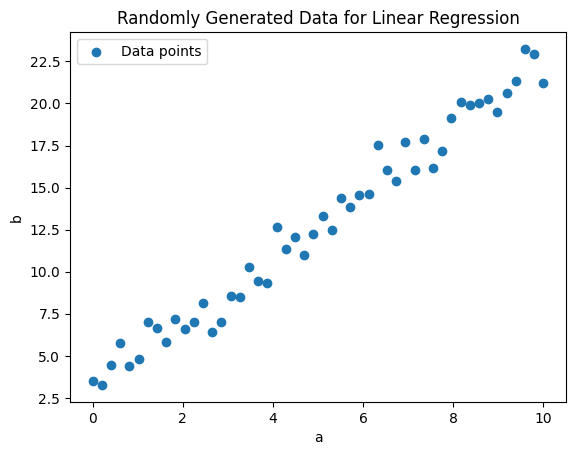

In [ ]:
# Plot the generated data points
plt.scatter(a, b, label="Data points")
plt.xlabel("a")
plt.ylabel("b")
plt.title("Randomly Generated Data for Linear Regression")
plt.legend()
plt.show()

In [ ]:
# Define log-likelihood function from scratch using beta0, beta1, and sigma
def log_likelihood(beta0, beta1, sigma, a, b):
    n = len(b)
    residuals = b - (beta0 + beta1 * a)
    return -0.5 * n * np.log(2 * np.pi * sigma**2) - (np.sum(residuals**2) / (2 * sigma**2))

Now, as we have to increase log likehood we have to minimize $( y_i - (\beta_0 + \beta_1 x_i)$, gradient descent can be used. In gradient descent, gradient is used to determine direction as well as rate of change of the loss function for each parameter [6]. The gradient with repect to $\beta_0$ and $\beta_1$ can be written as follow:

$$\frac{\partial \text{Loss}}{\partial \beta_0} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i));$$

$$\frac{\partial \text{Loss}}{\partial \beta_1} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i)) x_i$$

After that the gradient is used to update $\beta_0$ and $\beta_1$. The update rule apply as follow for $\beta_0$ and $\beta_1$ :

$$\beta_0 \leftarrow \beta_0 + \alpha \sum_{i=1}^{n} \left( y_i - (\beta_0 + \beta_1 x_i) \right);$$

$$\beta_1 \leftarrow \beta_1 + \alpha \sum_{i=1}^{n} \left( y_i - (\beta_0 + \beta_1 x_i) \right) x_i$$

Where $\alpha$ is the learning rate. There is a trade-off to consider while selecting proper value for $\alpha$. If the rate is too large, the gradient descent may oversoot. On the ither hand, the process can slow down significantly if the rate is too small.

The process generally iterated until convergence (in this case, it iterates the process for 10000 times).

In [ ]:
#Perform Gradient Descent to maximize log-likelihood

#Gradient Descent Parameter
learning_rate = 0.0001
num_iterations = 10000
beta0, beta1, sigma = 0, 0, 1  # random guesses for beta0, beta1, sigma
frames = []  # To store images for the GIF

for i in range(1,num_iterations+1):
    residuals = b - (beta0 + beta1 * a)

    # Compute gradients of log-likelihood w.r.t beta0, beta1, and sigma
    d_beta0 = np.sum(residuals) / (sigma**2)
    d_beta1 = np.sum(residuals * a) / (sigma**2)
    d_sigma = -len(b) / sigma + np.sum(residuals**2) / (sigma**3)

    # Update parameters using the gradients
    beta0 += learning_rate * d_beta0
    beta1 += learning_rate * d_beta1
    sigma += learning_rate * d_sigma

    # Ensure sigma remains positive (as it is the standard deviation)
    sigma = abs(sigma)

    # Print progress every 1000 iterations
    if i % 1000 == 0 :
        print(f"Iteration {i}: beta0 = {beta0}, beta1 = {beta1}, sigma = {sigma}")
    #save for creating gif
    if i%500 == 0:
      plt.figure()
      plt.scatter(a, b, label="Data Points")
      plt.plot(a, beta0 + beta1 * a, color="red", label=f"Iteration {i}")
      plt.xlabel("a")
      plt.ylabel("b")
      plt.title(f"Gradient Descent Fit at Iteration {i}")
      plt.legend()
      filename = f"frame_{i}.png"
      plt.savefig(filename)
      plt.close()
      frames.append(imageio.imread(filename))

# Final parameter estimates
print("\nFinal estimated parameters:")
print(f"Estimated intercept (beta0): {beta0}")
print(f"Estimated slope (beta1): {beta1}")
print(f"Estimated standard deviation (sigma): {sigma}")

#Calculate predictions using the estimated parameters
b_pred = beta0 + beta1 * a

# Print metrics for the estimated model
print_metrics(b, b_pred, "Gradient Descent MLE")

# Save GIF
imageio.mimsave("gradient_descent_mle.gif", frames, duration=0.5)

Iteration 1000: beta0 = 1.0016595345181232, beta1 = 2.250617966215684, sigma = 1.679589678723732
Iteration 2000: beta0 = 2.094431549997813, beta1 = 2.087134533779144, sigma = 1.072599882817605
Iteration 3000: beta0 = 2.8115857788630896, beta1 = 1.9798451511261577, sigma = 0.9204109763260276
Iteration 4000: beta0 = 3.00888083773231, beta1 = 1.950328954728549, sigma = 0.9089580514004829
Iteration 5000: beta0 = 3.052380929665866, beta1 = 1.943821152332565, sigma = 0.9084007325150871
Iteration 6000: beta0 = 3.0618260186477406, beta1 = 1.942408126061255, sigma = 0.9083744565537349
Iteration 7000: beta0 = 3.063875293124978, beta1 = 1.9421015457125659, sigma = 0.9083732196159329
Iteration 8000: beta0 = 3.0643199029356962, beta1 = 1.9420350301567852, sigma = 0.9083731613914375
Iteration 9000: beta0 = 3.064416365152453, beta1 = 1.94202059899084, sigma = 0.9083731586507335
Iteration 10000: beta0 = 3.0644372935222632, beta1 = 1.942017468015958, sigma = 0.908373158521725

Final estimated parameter

In [ ]:
def gradient_descent_mle(a, b, learning_rate=0.0001, num_iterations=10000, beta0_init=0, beta1_init=0, sigma_init=1):

    beta0, beta1, sigma = beta0_init, beta1_init, sigma_init
    frames = []  # To store images for the GIF

    for i in range(1, num_iterations + 1):
        residuals = b - (beta0 + beta1 * a)

        # Compute gradients of log-likelihood w.r.t beta0, beta1, and sigma
        d_beta0 = np.sum(residuals) / (sigma**2)
        d_beta1 = np.sum(residuals * a) / (sigma**2)
        d_sigma = -len(b) / sigma + np.sum(residuals**2) / (sigma**3)

        # Update parameters using the gradients
        beta0 += learning_rate * d_beta0
        beta1 += learning_rate * d_beta1
        sigma += learning_rate * d_sigma

        # Ensure sigma remains positive (as it is the standard deviation)
        sigma = abs(sigma)

        # Print progress every 1000 iterations
        if i % 1000 == 0:
            print(f"Iteration {i}: beta0 = {beta0}, beta1 = {beta1}, sigma = {sigma}")

        # Save frames for GIF creation
        if i % 100 == 0:
            plt.figure()
            plt.scatter(a, b, label="Data Points")
            plt.plot(a, beta0 + beta1 * a, color="red", label=f"Iteration {i}")
            plt.xlabel("a")
            plt.ylabel("b")
            plt.title(f"Gradient Descent Fit at Iteration {i}")
            plt.legend()
            filename = f"frame_{i}.png"
            plt.savefig(filename)
            plt.close()
            frames.append(imageio.imread(filename))

    # Save GIF
    imageio.mimsave("gradient_descent_mle.gif", frames, duration=0.5,loop=0) #loop-0 makes this infinite loop
    # Final parameter estimates
    print("\nFinal estimated parameters:")
    print(f"Estimated intercept (beta0): {beta0}")
    print(f"Estimated slope (beta1): {beta1}")
    print(f"Estimated standard deviation (sigma): {sigma}")
    # Print metrics for the estimated model
    print_metrics(b, b_pred, "Gradient Descent MLE")

    return beta0, beta1, sigma

In [ ]:
# Perform gradient descent
beta0, beta1, sigma = gradient_descent_mle(
    a, b,
    learning_rate=0.0001,
    num_iterations=5000
)

(beta0, beta1, sigma)

Iteration 1000: beta0 = 1.0016595345181232, beta1 = 2.250617966215684, sigma = 1.679589678723732
Iteration 2000: beta0 = 2.094431549997813, beta1 = 2.087134533779144, sigma = 1.072599882817605
Iteration 3000: beta0 = 2.8115857788630896, beta1 = 1.9798451511261577, sigma = 0.9204109763260276
Iteration 4000: beta0 = 3.00888083773231, beta1 = 1.950328954728549, sigma = 0.9089580514004829
Iteration 5000: beta0 = 3.052380929665866, beta1 = 1.943821152332565, sigma = 0.9084007325150871

Final estimated parameters:
Estimated intercept (beta0): 3.052380929665866
Estimated slope (beta1): 1.943821152332565
Estimated standard deviation (sigma): 0.9084007325150871
Gradient Descent MLE Mean Squared Error: 0.8251, R^2 Score: 0.9754


(3.052380929665866, 1.943821152332565, 0.9084007325150871)

The R-Squared measure is 0.9754 which menas the model can explain or catch 97.54% variablity of the data.

The below block will create a Graphics Interchange Format (GIF) of the gradient descent approach. This shows how the parameter converge using gradient descent. The final block shows how the model's prediction approximating the original distribution.

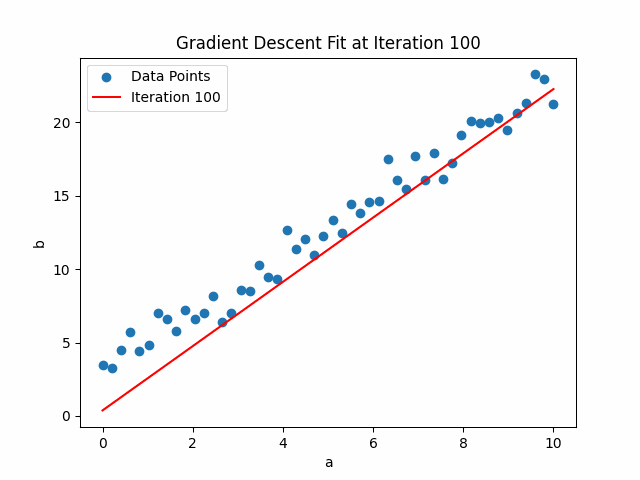

In [ ]:
# Display the GIF
Image(filename="gradient_descent_mle.gif")

###Section-4.2: Analysis on House Price Dataset

Now that, we explored the MLE approach with gradient descent from scratch, let's explore the approach by levaraging scikit learn package. We will use the house price dataset now. By setting loss="squared_error" and SGDRegressor which approximate maximizing the likelihood function (minimizing the negative log likehood).
However, in this approach Stochastic gradient descent (SGD) is used where the model parameters are updated using one or few samples at a time rather than using the whole dataset which can get more unstable because of noise but offer better efficiency, generalization capability as well as prevent overfitting.

In [ ]:
learning_rate = 0.01  # Learning rate for gradient descent
num_iterations = 10000  # Maximum number of iterations

mle_model = SGDRegressor(
    loss="squared_error",
    max_iter=num_iterations,
    eta0=learning_rate,
    learning_rate="constant",    # Keeps the learning rate constant
    tol=1e-4,                    # Stops if improvement is smaller than this threshold
    random_state=42              # Ensures consistent results across runs
)

y_train_normalized_mle = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Fit the model using gradient descent
mle_model.fit(X_train_normalized, y_train_normalized_mle)

# Predict on the test set
y_pred_normalized = mle_model.predict(X_test_normalized)

# Print metrics for the model
print_metrics(y_test_normalized, y_pred_normalized, "MLE with Gradient Descent:")

# Predict on the training set
y_train_pred_normalized = mle_model.predict(X_train_normalized)

# Calculate MSE and R^2 for training set
train_mse = mean_squared_error(y_train_normalized_mle, y_train_pred_normalized)
train_r2 = r2_score(y_train_normalized_mle, y_train_pred_normalized)

# Calculate MSE and R^2 for test set
test_mse = mean_squared_error(y_test_normalized, y_pred_normalized)
test_r2 = r2_score(y_test_normalized, y_pred_normalized)

MLE with Gradient Descent: Mean Squared Error: 0.2866, R^2 Score: 0.6613


Our implemented model has achieved an R-squared measure of 66.13% which signifies that the model catches more than 66.13% variability of data distribution. Now, let's explore some insights about the model's performance on the datset fo which we need to perform denormalization on our prediction.

In [ ]:
# Inverse transform the normalized predictions and actual values to their original scale
y_test_original = scaler_y.inverse_transform(y_test_normalized.reshape(-1, 1)).flatten()
y_pred_original = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1)).flatten()

Training MSE: 0.3177120311612292
Testing MSE: 0.2866496350453689
Training R^2: 0.6822879688387709
Testing R^2: 0.6613033309057121


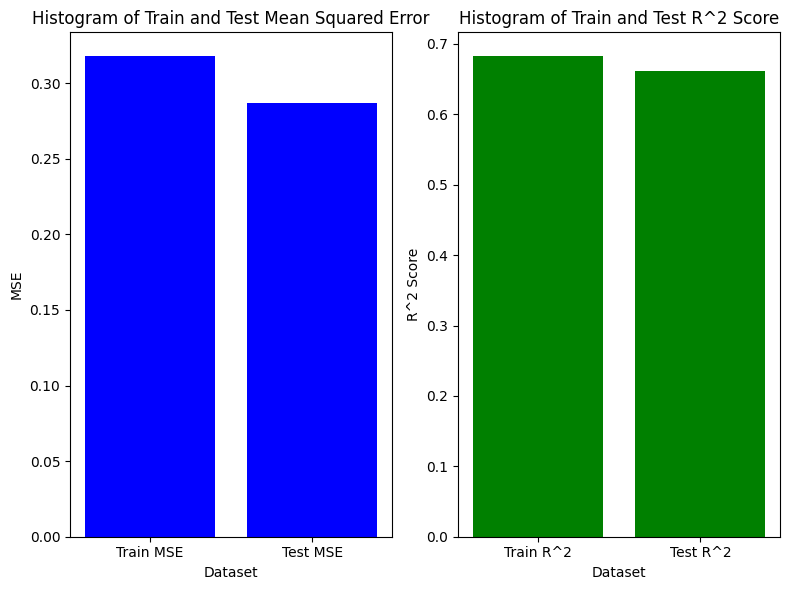

In [ ]:
# Printing metrics
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R^2:", train_r2)
print("Testing R^2:", test_r2)

# Create lists for plotting
mse_values = [train_mse, test_mse]
r2_values = [train_r2, test_r2]

# Plotting the histograms
plt.figure(figsize=(8, 6))

# Histogram for MSE
plt.subplot(1, 2, 1)
plt.bar(['Train MSE', 'Test MSE'], mse_values, color='blue')
plt.title('Histogram of Train and Test Mean Squared Error')
plt.xlabel('Dataset')
plt.ylabel('MSE')

# Histogram for R^2 Score
plt.subplot(1, 2, 2)
plt.bar(['Train R^2', 'Test R^2'], r2_values, color='green')
plt.title('Histogram of Train and Test R^2 Score')
plt.xlabel('Dataset')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()

"The training and testing metrics appear to be well-aligned with the dataset. From these metrics, it is clear that there are no signs of overfitting. This indicates that our model has generalized well and is likely to perform effectively on unseen data.

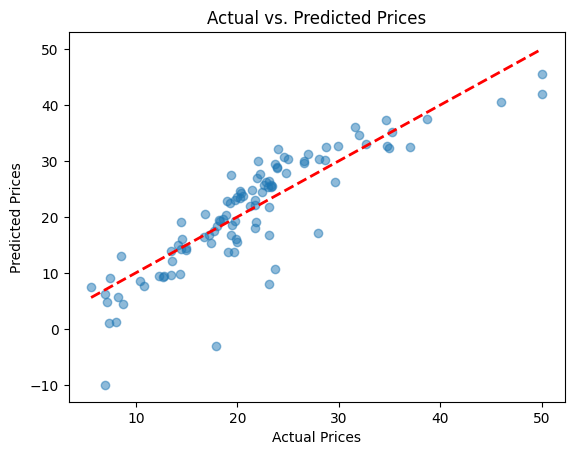

In [ ]:
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

This scatter plot compares the actual price and predicted price. Where x-axis and y-axis are the actual and predicted price respectively. The red dashed line signifies line of perfect prediction.

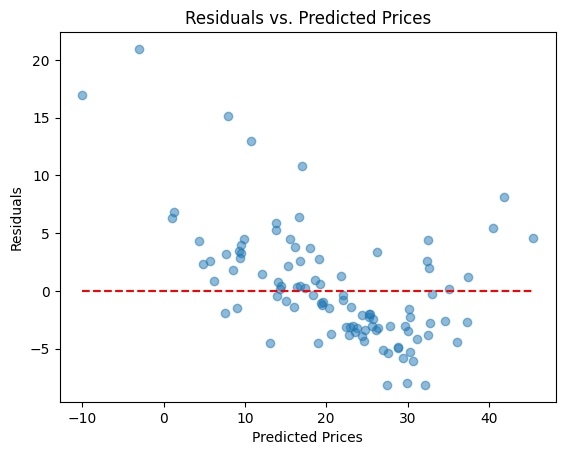

In [ ]:
residuals = y_test_original - y_pred_original
plt.scatter(y_pred_original, residuals, alpha=0.5)
plt.hlines(0, min(y_pred_original), max(y_pred_original), colors='r', linestyles='dashed')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Prices")
plt.show()

This plot shows the distribution of error for our prediction. Ideally the point should perfectly align with the red dashed line. However, the inconsistent distribution indicate most of the errors are random.

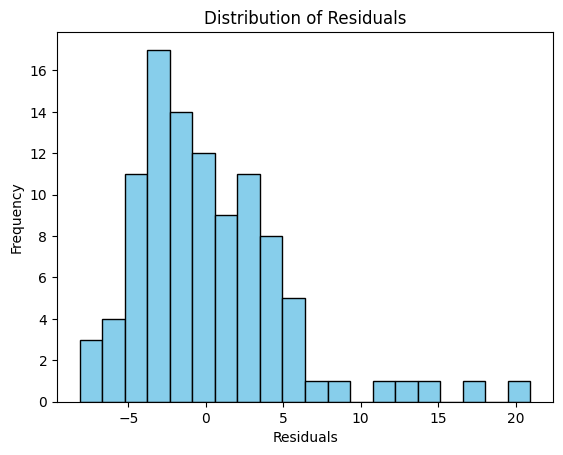

In [ ]:
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

This histogram shows the frequency of residuals. A distribution centered around zero suggests that errors are random and that the model predictions are generally unbiased.

On the other hand, the Feature Importance Plot shows the relative importance of various features in predicting housing prices. It signifies the importance of each feature in predicting housing prices based on the model's learned coefficients or feature weights. Normalizing the data before analysis ensures that the feature importance truly reflects the model's interpretation of the relationships in the data rather than being biased by feature scale.

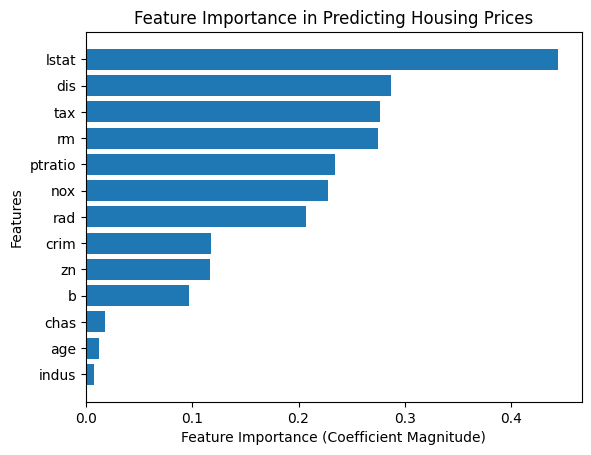

In [ ]:
feature_importance = np.abs(mle_model.coef_)

# Sort features by importance
sorted_indices = np.argsort(feature_importance)
sorted_feature_importance = feature_importance[sorted_indices]
sorted_features = X_train.columns[sorted_indices]

plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, tick_label=sorted_features)
plt.xlabel("Feature Importance (Coefficient Magnitude)")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Housing Prices")
plt.show()

###Section-4.3: Exploring Underfit to Overfit - The Spectrum and Optimal Fit

In this section, we look at how models can go from underfitting to overfitting, forming a spectrum. Underfitting happens when the model is too simple and misses important patterns in the data. Overfitting, on the other hand, occurs when the model is too complex and picks up noise or unnecessary details, making it perform poorly on new data. The sweet spot in this spectrum is called the optimal fit. Here, the model is just right—not too simple or too complex. It captures the important patterns while ignoring the noise, making it work well on both the current data and new, unseen data.

Now, we will create a model using a low-degree polynomial (degree = 1) to fit the data. A linear model is too simple to capture the true relationship within the data. This results in poor performance on both the training data and unseen data. It is a classic example of high bias, where the model fails to learn the actual structure of the data. In this visualization, The green line shows the model's predictive outcome. The red data points are scattered far from the line which means the model fails to fit the training data effectively. This high-bias scenario results in poor performance on both the training data and unseen data, as the model cannot learn the underlying structure of the data.

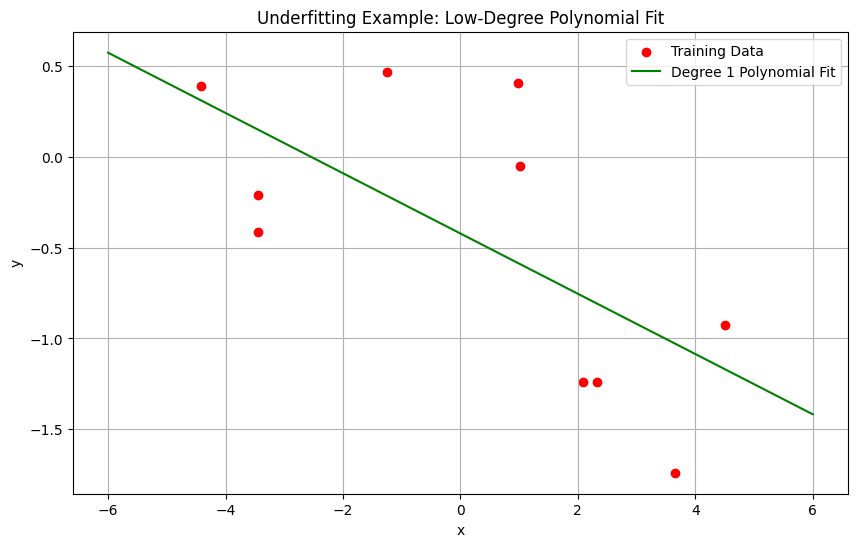

In [ ]:
# Generate random data
np.random.seed(42)
n_points = 10  # Data points
x = np.sort(np.random.uniform(-5, 5, n_points))  # x value generation
y = -np.sin(x / 5) + np.cos(x) + np.random.normal(0, 0.2, n_points)  # y value generation

# Reshape x
x = x.reshape(-1, 1)

# Fit the low-degree polynomial regression model using scikit-learn
degree = 1  # Lower order polynomial to show underfitting
model_underfit = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_underfit.fit(x, y)  # Fit the model

# Generate predictions
x_plot = np.linspace(-6, 6, 500).reshape(-1, 1)  # Generate x-axis points
y_plot_underfit = model_underfit.predict(x_plot)  # Model prediction

# Plot data and the underfitting curve
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label="Training Data")  # Plot training data
plt.plot(x_plot, y_plot_underfit, color='green', label=f"Degree {degree} Polynomial Fit")
plt.title("Underfitting Example: Low-Degree Polynomial Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

This visualization/code snippet below is from Section-4.2 where a MLE approach is used on the House Price Prediction dataset. In this approach, the model demonstrates an optimal fit, which is evident from the points being distributed closely around the red dashed line.

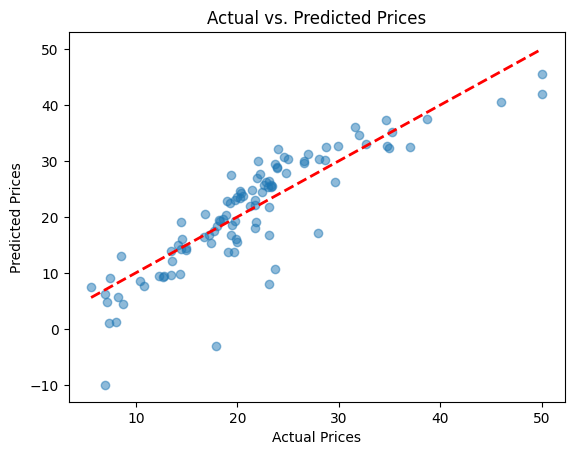

In [ ]:
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

In this example, we use a high-degree polynomial (degree = 9) to fit the data. While the model fits the training data very closely, it also captures random noise and unnecessary fluctuations in the data. This visualization shows us how the model is overfitting this small noisy dataset. As the model is fitting a strict line with this distribution it's losing it's generalization power. In terms of bias and variance, this is a low bias and high variance scenario.

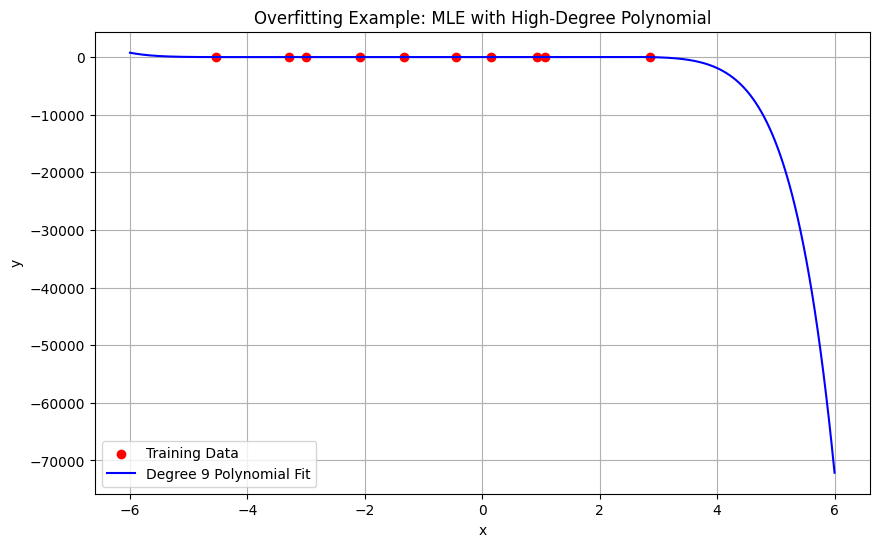

In [ ]:
x = np.sort(np.random.uniform(-5, 5, n_points))  # x value generation
y = -np.sin(x / 5) + np.cos(x) + np.random.normal(0, 0.2, n_points)  # y value generation

# Reshape x
x = x.reshape(-1, 1)

# Fit the high-degree polynomial regression model using scikit-learn
degree = 9 #higher order polynomial to show overfitting in MLE
model_mle = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_mle.fit(x, y)  # Fit the model

# Generate predictions
x_plot = np.linspace(-6, 6, 500).reshape(-1, 1)  # Generate x-axis point
y_plot_mle = model_mle.predict(x_plot)  # Model Prediction

# Plot data and the overfitting curve
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label="Training Data")  # Plot training data
plt.plot(x_plot, y_plot_mle, color='blue', label=f"Degree {degree} Polynomial Fit")
plt.title("Overfitting Example: MLE with High-Degree Polynomial")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

One of the drawbacks of Maximum Likelihood Estimation (MLE) is overfitting as it tends to overfit in small dataset [5]. The drawbacks of overfitting is that it tightly fits the data and that's why the model work better on training data but fail to predict efficiently on the test data.

One of the methods of preventing overfitting is using regularization. In the next approach, Maximum A Posteriori Estimation (MAP) uses prior belief as regularization term.


##Section-05: Maximum A Posteriori Estimation (MAP)

Maximum A Posteriori Estimation (MAP) follows a similar approach like MLE but incorporates prior knowledge about the parameters [5]. It maximizes the posterior probability, which is the probability of the parameters given the data and the prior distribution over the parameters.

This approach uses Bayes' Theorem to calculate posterior probability of $\theta$  (such as $\beta_0$, $\beta_1$, and, $ \sigma $ in regression) given the data D given as:

$$P(\theta \mid D) = \frac{P(D \mid \theta) \cdot P(\theta)}{P(D)}$$

Where:

$P(\theta | D)=$ posterior probability (probability of $\theta$ given data D),

$P(D | \theta)=$ likelihood (probability of data given $\theta$),

$P(\theta)=$ prior probability (our prior belief about $\theta$),

$P(D) =$ evidence (a normalization constant)


In MAP, we maximize the posterior probability which can be rephased as $P(\theta | D)$:

$$\theta_{\text{MAP}} = \arg \max_{\theta} P(\theta \mid D)$$

Since $P(D)$ is constant, using Bayes Theorem it becomes:


$$\theta_{\text{MAP}} = \arg \max_{\theta} P(D \mid \theta)P(\theta)$$


If we assume gaussian distribution for a paramter (consider $\beta_1$) we can represent $P(\theta)$ as:

$$ln(P(\theta)) = - \frac{\beta_1^2}{2\tau^2}$$

where $\beta_1 \sim N (0,\tau^2)$

Now, by taking log and simplifying it, we can get,
$$\theta_{MAP} = \arg \min_\theta (-\ln P (D \mid \theta ) +  \frac{\beta_1^2}{2\tau^2}$$

MAP Estimation combines the likelihood and the prior to maximize the posterior probability. The prior introduces a penalty term, which acts as regularization during parameter estimation. Here, the prior distribution is gaussian, so this a L2 regularization or ridge regression

Here, the $\frac{\beta_1^2}{2\tau^2}$ term used as a regularization term. That's why MAP is genrally considered as a MLE approach with regularization which makes it more efficient in optimizing the parameter for robust prediction.

###Section-5.1: MAP Implementation Using Synthetic Data

Using Maximum A Posteriori (MAP), we analyze simulated data by combining observed evidence with prior knowledge. This approach helps estimate parameters that are most probable given the data.

In [ ]:
# Generate random data for a linear relationship
np.random.seed(42)
N = 50  # number of data points
X = 2 * np.random.rand(N, 1)  # features
true_beta_0 = 4
true_beta_1 = 3
noise = np.random.randn(N, 1)
y = true_beta_0 + true_beta_1 * X + noise  # target with some noise

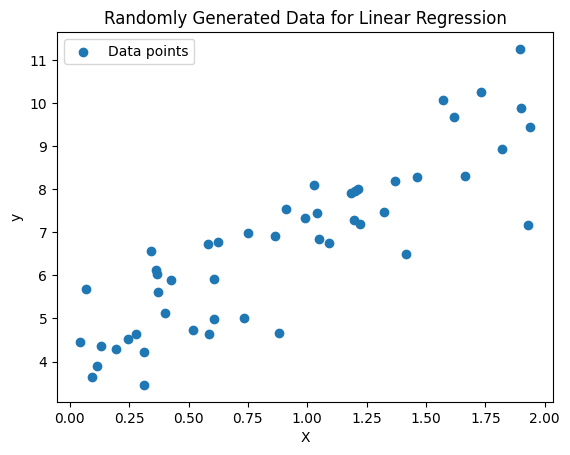

In [ ]:
# Plot the generated data points
plt.scatter(X, y, label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Randomly Generated Data for Linear Regression")
plt.legend()
plt.show()

In [ ]:
# Define the negative log-likelihood
def negative_log_likelihood(X, y, beta_0, beta_1, sigma):
    y_pred = beta_0 + beta_1 * X
    residuals = y - y_pred
    log_likelihood = -0.5 * np.sum((residuals / sigma) ** 2)
    return -log_likelihood

# Define the prior (Gaussian prior)
def log_prior(beta_1, tau_squared):
    return -0.5 * (beta_1 ** 2) / tau_squared

# Define the MAP objective function
def map_objective(X, y, beta_0, beta_1, sigma, tau_squared):
    nll = negative_log_likelihood(X, y, beta_0, beta_1, sigma)
    prior = log_prior(beta_1, tau_squared)
    return nll + prior

# Initial guesses for beta_0, beta_1, and sigma
initial_params = [0, 0, 1]  # [beta_0, beta_1, sigma]
tau_squared = 1  # prior variance

# Objective function to minimize
def objective(params):
    beta_0, beta_1, sigma = params
    return -map_objective(X, y, beta_0, beta_1, sigma, tau_squared)

In the Maximum Likelihood Estimation, we used gradient descent approach to optimize our objective function.

In case of MAP we will also use gradient descent as a optimization technique. The Maximum A Posteriori Estimation (MAP) has a regularization term that will make the MAP more resistant to overfitting.

In [ ]:
# Gradient descent for MAP estimation
def gradient_descent_map(X, y, tau_squared, learning_rate=0.0005, iterations=5000):
    beta_0 = 0  # Initial guess for beta_0
    beta_1 = 0  # Initial guess for beta_1
    sigma = 1   # Initial guess for sigma
    frames = []  # To store images for the GIF

    for i in range(iterations+1):
        # Compute predictions
        y_pred = beta_0 + beta_1 * X

        # Compute gradients
        grad_beta_0 = -np.sum((y - y_pred) / (sigma ** 2))
        grad_beta_1 = -np.sum((y - y_pred) * X / (sigma ** 2)) - (beta_1 / tau_squared)
        grad_sigma = -np.sum((y - y_pred) ** 2) / (sigma ** 3) + N / sigma

        # Update parameters
        beta_0 -= learning_rate * grad_beta_0
        beta_1 -= learning_rate * grad_beta_1
        sigma -= learning_rate * grad_sigma

        # Ensure sigma remains positive
        sigma = max(sigma, 1e-3)

        # Print progress every 1000 iterations
        if i % 1000 == 0:
            print(f"Iteration {i}: beta0 = {beta_0}, beta1 = {beta_1}")

        # Save frames for GIF creation every 500 iterations
        if i % 100 == 0:
            plt.figure()
            plt.scatter(X, y, label="Data Points")
            plt.plot(X, beta_0 + beta_1 * X, color="red", label=f"Iteration {i}")
            plt.xlabel("X")
            plt.ylabel("y")
            plt.title(f"Gradient Descent Fit at Iteration {i}")
            plt.legend()
            filename = f"frame-map_{i}.png"
            plt.savefig(filename)
            plt.close()
            frames.append(imageio.imread(filename))

    # Create GIF
    imageio.mimsave("gradient_descent_map.gif", frames, duration=0.5,loop=0) #loop-0 makes this infinite loop
    print("GIF saved as 'gradient_descent_map.gif'")

    return beta_0, beta_1, sigma

# Run gradient descent for MAP estimation
tau_squared = 10 # Prior variance
beta_0, beta_1, sigma = gradient_descent_map(X, y, tau_squared)

# Predict using the learned parameters
y_pred = beta_0 + beta_1 * X

# Print metrics
print_metrics(y, y_pred, "Gradient Descent for MAP Estimation")

Iteration 0: beta0 = 0.1668149535221666, beta1 = 0.17239520974829425
Iteration 1000: beta0 = 4.0104240800337925, beta1 = 2.9713425409413627
Iteration 2000: beta0 = 4.083199570141939, beta1 = 2.9033224605625576
Iteration 3000: beta0 = 4.083657857104215, beta1 = 2.9028941664180747
Iteration 4000: beta0 = 4.083660735433069, beta1 = 2.9028914764646805
Iteration 5000: beta0 = 4.083660753510616, beta1 = 2.902891459570241
GIF saved as 'gradient_descent_map.gif'
Gradient Descent for MAP Estimation Mean Squared Error: 0.8231, R^2 Score: 0.7683


 The MAP approach achieved Mean Squared Error (MSE) of 0.8231 and an R² score of 0.7683, indicating a good fit between the predicted and actual values. These results reflect the model's ability to capture patterns in the data while incorporating regularization to prevent overfitting.

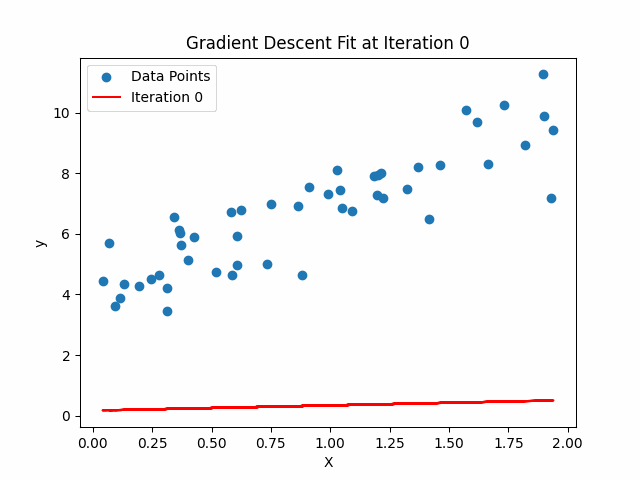

In [ ]:
# Display the GIF
Image(filename="gradient_descent_map.gif")

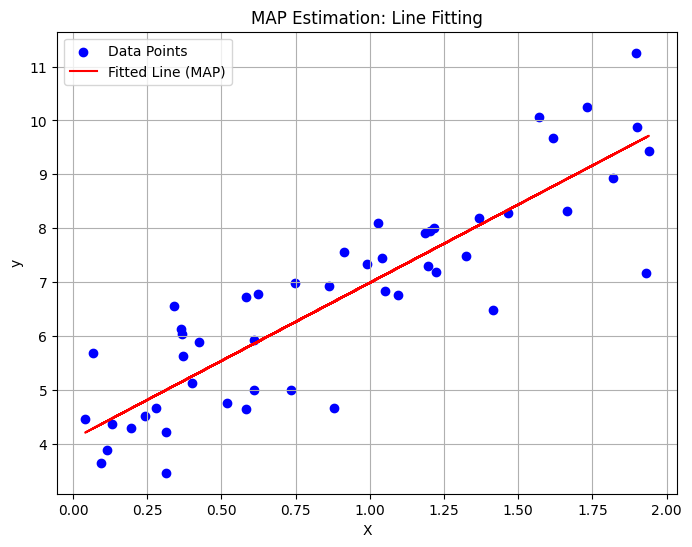

In [ ]:
# Generate the line for the fit
y_fit = beta_0 + beta_1 * X

# Plot the original data points and the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label="Data Points", color="blue")
plt.plot(X, y_fit, color="red", label="Fitted Line (MAP)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("MAP Estimation: Line Fitting")
plt.legend()
plt.grid()
plt.show()

###Section-5.2: Analysis on House Price Dataset

In contrast to Maximum Likelihood Estimation (MLE), Maximum A Posteriori Estimation (MAP) incorporates a prior belief about the parameters to estimate. For the house price dataset, we will implement MAP using the scikit-learn package ridge.

Ridge Regression also incorporates the concept of prior belief using regularization terms such as L2 regularization [7]. Ridge Regression minimizes a similar objective function like MAP, where the loss term represents the data likelihood (mean squared error), and the regularization term penalizes the squared magnitude of the coefficients $(\|\theta\|^2)$:

$$\theta_{\text{Ridge}} = \arg\min_{\theta} \left( \|y - X\theta\|^2 + \alpha \|\theta\|^2 \right)$$

Here, $\alpha$  corresponds to the regularization strength and is related to the prior's precision in Bayesian terms. This L2 regularization term acts as a constraint that aligns closely with Bayesian priors, penalizing large coefficients and improving model stability.

In [ ]:
# MAP approach with L2 regularization
map_model = Ridge(
    alpha=1.0,              # Regularization strength
    max_iter=1000,          # Maximum number of iterations for solvers
    tol=1e-4,               # tolerance for convergence
    random_state=42         # To reproduce the result
)
map_model.fit(X_train_normalized, y_train_normalized)
y_pred_map = map_model.predict(X_test_normalized)

# Calculate Mean Squared Error and R^2 for MAP

print_metrics(y_test_normalized, y_pred_map, "MLE with Gradient Descent:")

MLE with Gradient Descent: Mean Squared Error: 0.2366, R^2 Score: 0.7204


The MAP approach outperforms the MLE approach, as reflected in the improvement of the R² score from 0.6613 to 0.7204. This demonstrates how regularization, a key component of MAP, helps the model generalize better by constraining some parameters. These constraints reduce overfitting, improving the model's performance on unseen data.

In [ ]:
# Inverse transform the normalized predictions and actual values to their original scale
y_test_original = scaler_y.inverse_transform(y_test_normalized.reshape(-1, 1)).flatten()
y_pred_map_original = scaler_y.inverse_transform(y_pred_map.reshape(-1, 1)).flatten()

Train MSE: 0.2612, Test MSE: 0.2366
Train R^2: 0.7388, Test R^2: 0.7204


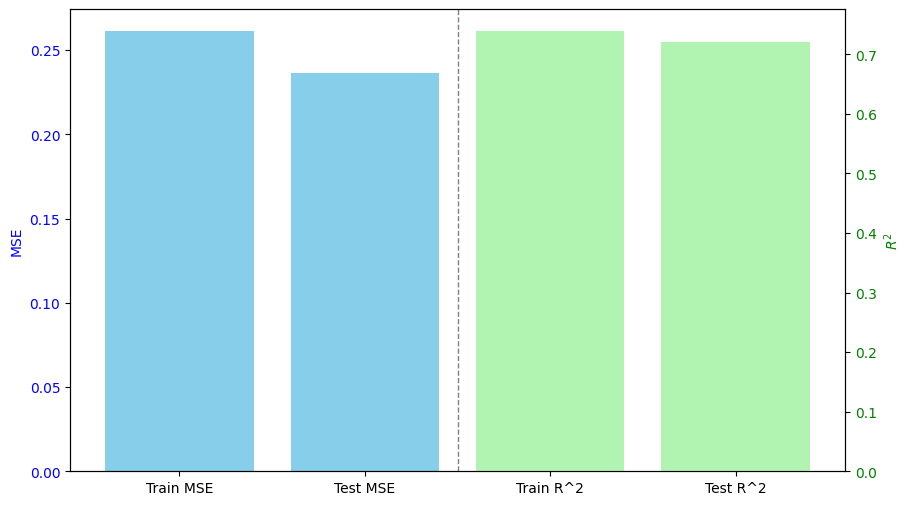

In [ ]:
# Predictions for train and test sets
y_train_pred = map_model.predict(X_train_normalized)
y_test_pred = map_model.predict(X_test_normalized)

# Calculate Train and Test MSE
train_mse = mean_squared_error(y_train_normalized, y_train_pred)
test_mse = mean_squared_error(y_test_normalized, y_test_pred)

# Calculate Train and Test R^2
train_r2 = r2_score(y_train_normalized, y_train_pred)
test_r2 = r2_score(y_test_normalized, y_test_pred)

# Print metrics
print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
print(f"Train R^2: {train_r2:.4f}, Test R^2: {test_r2:.4f}")

# Prepare data for histogram
metrics = {'Train MSE': train_mse, 'Test MSE': test_mse, 'Train R^2': train_r2, 'Test R^2': test_r2}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MSE on the primary y-axis
ax1.bar(['Train MSE', 'Test MSE'], [train_mse, test_mse], color='skyblue', label='MSE')
ax1.set_ylabel('MSE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

plt.axvline(x=1.5, color='gray', linestyle='--', linewidth=1)  # Add a vertical line

# Create a secondary y-axis for R^2
ax2 = ax1.twinx()
ax2.bar(['Train R^2', 'Test R^2'], [train_r2, test_r2], color='lightgreen', label='$R^2$', alpha=0.7)
ax2.set_ylabel('$R^2$', color='green')
ax2.tick_params(axis='y', labelcolor='green')

Higher $R^2$ values and lower MSE values indicate that the model is fitting the data well and generalizing effectively. The balanced scores between train and test suggest no potential of overfitting or underfitting.

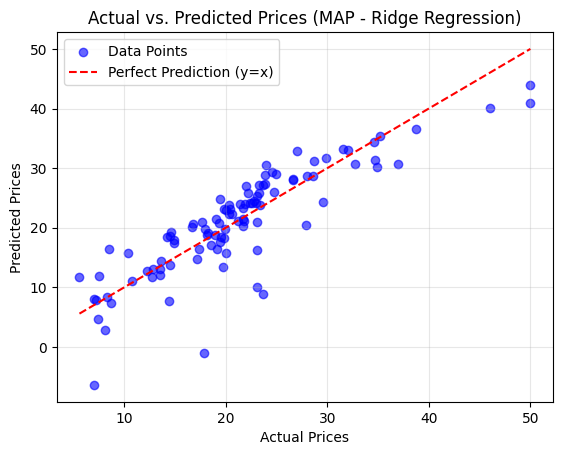

In [ ]:
plt.scatter(y_test_original, y_pred_map_original, color='blue', alpha=0.6, label='Data Points')
plt.plot([min(y_test_original), max(y_test_original)],
         [min(y_test_original), max(y_test_original)],
         color='red', linestyle='--', label='Perfect Prediction (y=x)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (MAP - Ridge Regression)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The red dashed line represents the ideal case where predictions perfectly match actual values. Most points being close to this line shows that the model performs well in making predictions.

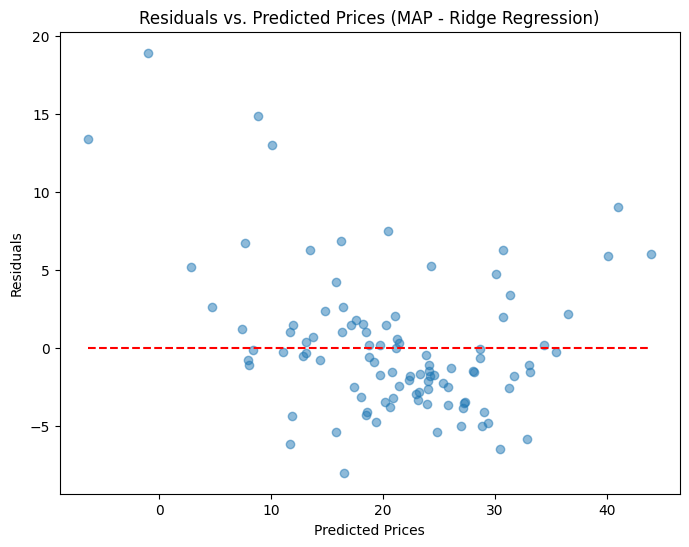

In [ ]:
residuals = y_test_original - y_pred_map_original
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_map_original, residuals, alpha=0.5)
plt.hlines(0, min(y_pred_map_original), max(y_pred_map_original), colors='r', linestyles='dashed')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Prices (MAP - Ridge Regression)")
plt.show()

This plot illustrates the residuals (errors) against the predicted prices.
The horizontal red line at zero represents perfect predictions. The scatter of points around this line indicates how much error exists in the predictions. A random pattern suggests that the model assumptions are appropriate as it indicate the model is not impacting by any external source or noise.

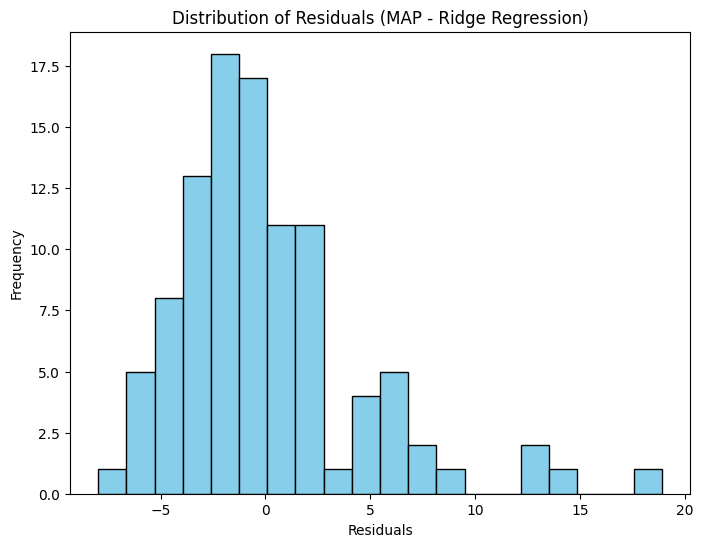

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (MAP - Ridge Regression)")
plt.show()

The histogram represents the distribution of the residuals. A roughly symmetric, bell-shaped distribution centered around zero suggests that the model's errors are normally distributed, which is a good sign for linear regression.

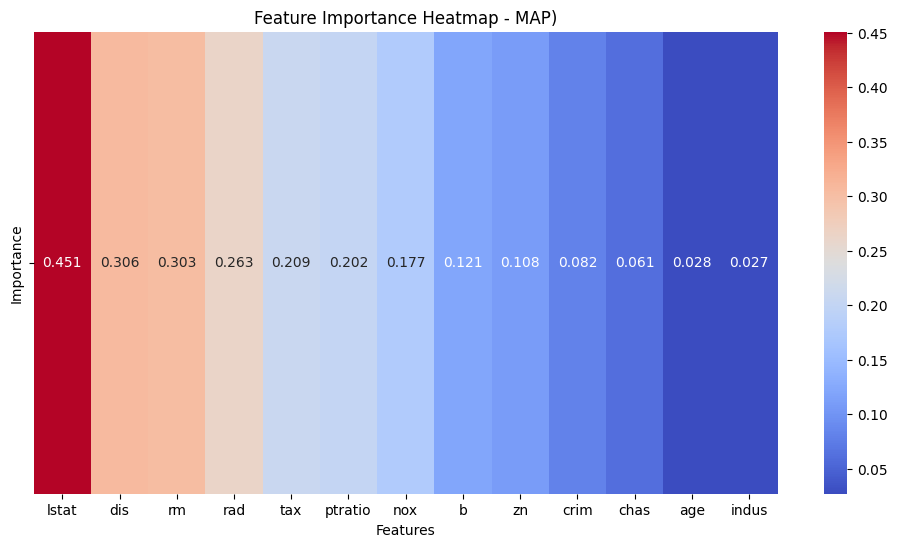

In [ ]:
# Flatten the coefficients array in case it is multidimensional
feature_importance = np.abs(map_model.coef_).flatten()

coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,  # feature names
    'Importance': feature_importance  # Flattened importance values
})

# Sort the importance
coefficients_df = coefficients_df.sort_values(by='Importance', ascending=False)

#plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(coefficients_df.set_index('Feature').T, annot=True, cmap='coolwarm', cbar=True, fmt=".3f")
plt.title('Feature Importance Heatmap - MAP)')
plt.xlabel('Features')
plt.show()

This heatmap ranks the importance of different features in the model based on their contribution to predictions. Features like lstat and rm (low-status population and number of rooms, respectively) are more significant, while others like age have minimal impact. Such visualizations help understand which variables drive the model's decisions.

###Section-5.3: Comparison Between MLE and MAP

Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) are both parameter estimation techniques, but they differ fundamentally. MLE only uses the data to maximize the likelihood. It doen not assume any prior knowledge about the parameter. On the other hand, MAP uses prior beliefs using a probability distribution (the prior). This makes MAP more robust when data is limited or noisy because it balances the influence of the data and the prior. MLE can overfit in small datasets, while MAP's integrated prior knowledge regularize the estimation.

In [ ]:
# Simulated data (smaller dataset)
np.random.seed(42)
data = np.random.normal(10, 2, size=50)  # Reduce dataset size

Now we will estimate the mean of a Gaussian distribution using both MLE and MAP to highlight their differences. For MLE, we minimize the negative log-likelihood, relying solely on the observed data. For MAP, we include a prior term and minimize the negative log-posterior, combining the influence of the data and prior knowledge. To make the differences more prominent, we use a small dataset, where the impact of the prior is stronger. Both estimates are calculated using the scipy.optimize.minimize function and the results are visualized with a histogram to compare the approaches.

In [ ]:
# Define the negative log-likelihood function (for MLE)
def neg_log_likelihood(mu):
    return np.sum((data - mu) ** 2) / 2  # Scaled for stability

# Define the negative log-posterior function (for MAP)
def neg_log_posterior(mu, prior_mu=8, prior_sigma=0.5):  # Stronger prior
    likelihood = np.sum((data - mu) ** 2) / 2  # Scaled likelihood
    prior = ((mu - prior_mu) ** 2) / (2 * prior_sigma ** 2)  # Stronger prior variance
    return likelihood + prior

In [ ]:
# Optimization for MLE
mle_result = minimize(neg_log_likelihood, x0=np.mean(data), method='L-BFGS-B')
mle_mu = mle_result.x[0]

# Optimization for MAP
map_result = minimize(neg_log_posterior, x0=np.mean(data), args=(8, 0.5), method='L-BFGS-B')  # Stronger prior
map_mu = map_result.x[0]

# Results
print(f"MLE Estimated Mean: {mle_mu}")
print(f"MAP Estimated Mean: {map_mu}")

MLE Estimated Mean: 9.54905218948772
MAP Estimated Mean: 9.434307599542699


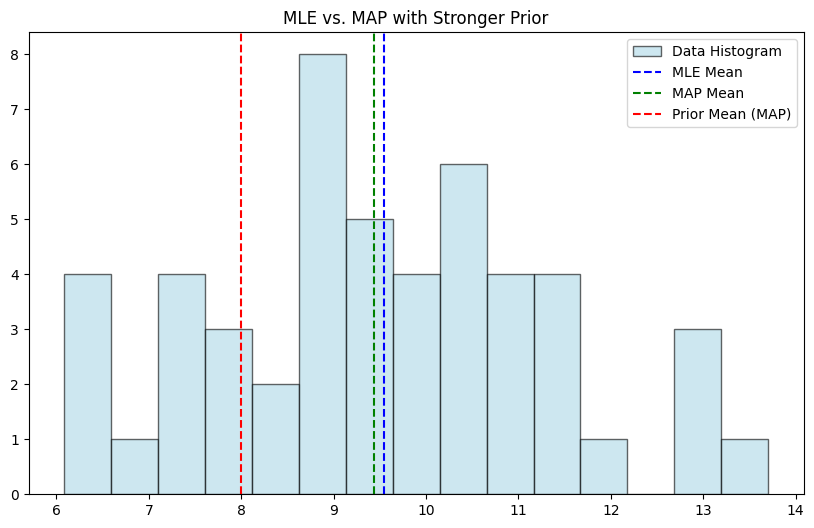

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(data, bins=15, alpha=0.6, label='Data Histogram', color='lightblue', edgecolor='black')
plt.axvline(mle_mu, color='blue', linestyle='--', label='MLE Mean')
plt.axvline(map_mu, color='green', linestyle='--', label='MAP Mean')
plt.axvline(8, color='red', linestyle='--', label='Prior Mean (MAP)')
plt.legend()
plt.title('MLE vs. MAP with Stronger Prior')
plt.show()

The results show the estimated mean values for MLE and MAP. In the plot, the blue line represents the MLE estimate, and the green line shows the MAP estimate. The red line marks the prior mean. In this case, MAP is closer to the prior mean because the dataset is small, and the prior has a strong influence. MLE, however, relies solely on the data, so its estimate is further from the prior. This demonstrates how MAP balances prior knowledge with the observed data, especially in scenarios with limited data.

##Section-06: Bayesian Linear Regression (BLR)


Bayesian Linear Regression (BLR) is a extension of Maximum A Posteriori Estimation framework where uncertainty into the parameter estimates and predictions are incorporated in the framework. Instead of optimizing the objective function with prior belief  BLR considers the entire posterior distribution of parameters given the data [5].

In MAP estimation, we optimize:
$$\theta_{MAP} = \arg \min_\theta (-\ln P (D \mid \theta ) +  \frac{\beta_1^2}{2\tau^2}$$
Where

$ln P (D \mid \theta )$: The likelihood

$\frac{\beta_1^2}{2\tau^2}$: The prior (also act as regularization)

The likelihood can be derived from the gaussian distribution $P(D \mid \theta) = \mathcal{N}(Y \mid \Phi \theta, \sigma^2 I)$ which means

$$-\ln P(D \mid \theta) = \frac{\|Y - \Phi \theta\|^2}{2\sigma^2}$$

Using this expression the objective function of MAP can be rewritten as:

$$\theta_{MAP} = \arg \min_\theta (-\ln P \frac{\|Y - \Phi \theta\|^2}{2\sigma^2} +  \frac{\beta_1^2}{2\tau^2})$$
Now, to solve for $\theta_{MAP}$ take the derivative of the function with respect to \theta and set it zero,

$$\frac{1}{\sigma^2} \Phi^T (\Phi \theta - Y) + \frac{1}{\tau^2} \theta = 0$$
Then, the function can be rearranged to solve for $\theta_{MAP}$:

$$\theta_{\text{MAP}} = (\Phi^T \Phi + \lambda I)^{-1} \Phi^T Y$$
where $\lambda = \frac{\sigma^2}{\tau^2}$ reflects the regularization strength.

Until BLR we used to find only optimized value for objective function or $\theta$. Bayesian Linear Regression takes a different approach here by modeling $\theta$ as  a distribution rather than a single value as follow:

$$P(\theta \mid D) = \mathcal{N}(\theta \mid m_N, S_N)$$
Where

Mean: $\quad m_N = \theta_{\text{MAP}} = (\Phi^T \Phi + \lambda I)^{-1} \Phi^T Y
$

Covariance: $\quad S_N = \left(\frac{1}{\sigma^2} \Phi^T \Phi + \frac{1}{\tau^2} I\right)^{-1}$

Thus for a new inut, the prediction will be:

$$P(y^* \mid x^*) = \mathcal{N}(\Phi(x^*)^T m_N, \Phi(x^*)^T S_N \Phi(x^*) + \sigma^2)$$
where $\Phi(x^*)^T m_N$ is the mean.

###Section-6.1: BLR Implementation Using Synthetic Data

Using Bayesian Linear Regression (BLR), we analyze simulated data by incorporating prior beliefs and data evidence. This method provides predictions along with uncertainty estimates.

In [ ]:
# Generate random data for a linear relationship
np.random.seed(42)
N = 50  # number of data points
X = 2 * np.random.rand(N, 1)  # features
true_beta_0 = 4
true_beta_1 = 3
noise = np.random.randn(N, 1)
y = true_beta_0 + true_beta_1 * X + noise  # target with some noise

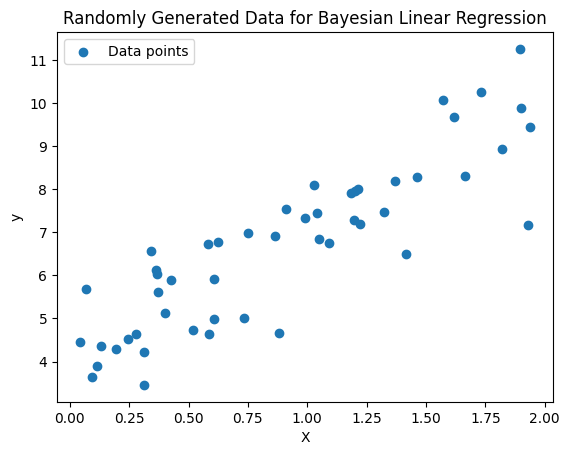

In [ ]:
# Plot the generated data points
plt.scatter(X, y, label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Randomly Generated Data for Bayesian Linear Regression")
plt.legend()
plt.show()

In [ ]:
# Bayesian Linear Regression implementation
class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha  # Prior precision
        self.beta = beta    # Likelihood precision
        self.posterior_mean = None
        self.posterior_covariance = None

    def fit(self, X, y):
        # Add bias
        X_design = np.hstack([np.ones((X.shape[0], 1)), X])
        n_features = X_design.shape[1]

        # Define prior
        prior_mean = np.zeros((n_features, 1))
        prior_covariance = (1 / self.alpha) * np.eye(n_features)

        # Compute posterior covariance
        self.posterior_covariance = np.linalg.inv(
            self.beta * X_design.T @ X_design + np.linalg.inv(prior_covariance)
        )

        # Compute posterior mean
        self.posterior_mean = self.posterior_covariance @ (
            self.beta * X_design.T @ y + np.linalg.inv(prior_covariance) @ prior_mean
        )

    def predict(self, X):

        # Add bias
        X_design = np.hstack([np.ones((X.shape[0], 1)), X])

        # Predictive mean and variance
        predictive_mean = X_design @ self.posterior_mean
        predictive_variance = 1 / self.beta + np.sum(
            X_design @ self.posterior_covariance * X_design, axis=1, keepdims=True
        )

        return predictive_mean, predictive_variance

In [ ]:
# Instantiate the Bayesian Linear Regression model
alpha = 1.0  # Prior precision
beta = 1.0   # Likelihood precision
blr = BayesianLinearRegression(alpha=alpha, beta=beta)

In [ ]:
# Fit the model
blr.fit(X, y)

# Predict using the model
y_pred_mean, y_pred_var = blr.predict(X)

# Evaluate and print metrics
print_metrics(y, y_pred_mean, "Bayesian Linear Regression")

# Compute predictive standard deviation using the BayesianLinearRegression model
predictive_std_dev = np.sqrt(blr.predict(X)[1])

Bayesian Linear Regression Mean Squared Error: 0.8299, R^2 Score: 0.7664


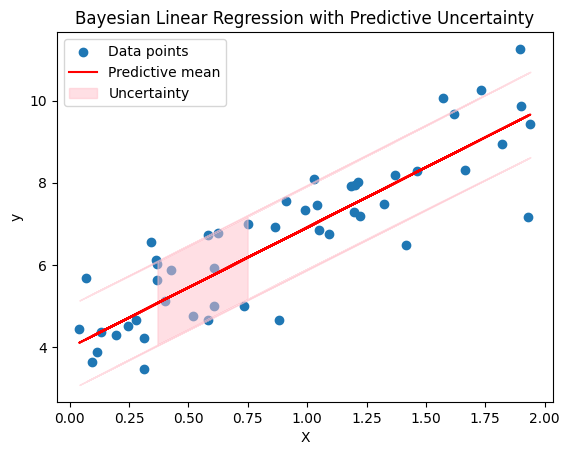

In [ ]:
# Plot predictions with uncertainty
plt.scatter(X, y, label="Data points")
plt.plot(X, y_pred_mean, color="red", label="Predictive mean")
plt.fill_between(
    X.flatten(),
    (y_pred_mean - predictive_std_dev).flatten(),
    (y_pred_mean + predictive_std_dev).flatten(),
    color="pink",
    alpha=0.5,
    label="Uncertainty"
)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Bayesian Linear Regression with Predictive Uncertainty")
plt.legend()
plt.show()

This plot shows the Bayesian linear regression results, with the red line representing the predicted trend and the pink shaded area indicating uncertainty. Most points fall within the shaded area that indicates the model's predictions are both accurate and reliable.

###Section-6.2: Analysis on House Price Dataset

Using Bayesian Linear Regression (BLR), we analyze the house price dataset to identify factors influencing property prices. BLR incorporates prior beliefs with data evidence, providing a probabilistic approach to predict prices and quantify uncertainty in the predictions.

In [ ]:
# Bayesian Linear Regression
bayesian_model = BayesianRidge(
    max_iter=10000,
    tol=1e-4,
)
bayesian_model.fit(X_train_normalized, y_train_normalized.ravel())
y_pred_bayesian = bayesian_model.predict(X_test_normalized)

# Evaluate and print metrics
print_metrics(y_test_normalized, y_pred_bayesian, "Bayesian Linear Regression")

Bayesian Linear Regression Mean Squared Error: 0.2353, R^2 Score: 0.7219


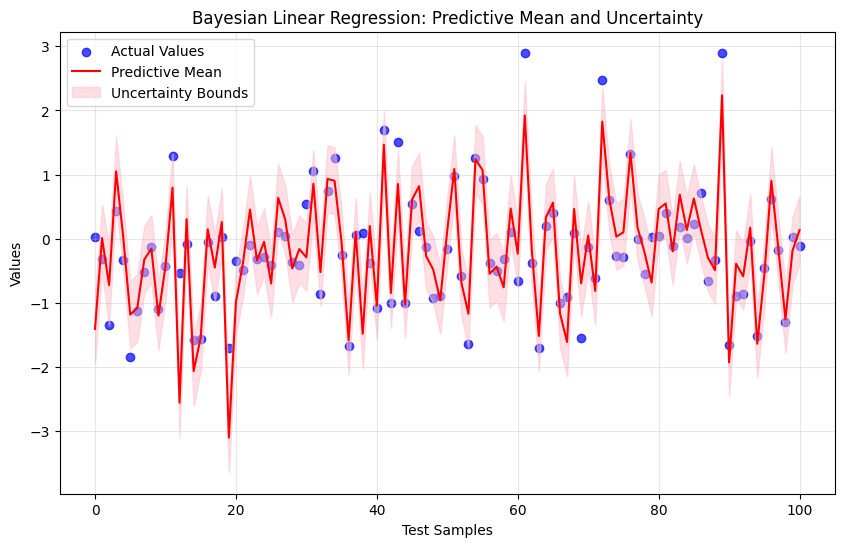

In [ ]:
# Predict with Bayesian Linear Regression and get standard deviation
y_pred_mean, y_pred_std = bayesian_model.predict(X_test_normalized, return_std=True)

# Plot predictive mean and uncertainty
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_normalized)), y_test_normalized, label="Actual Values", alpha=0.7, color='blue')
plt.plot(range(len(y_pred_mean)), y_pred_mean, color='red', label="Predictive Mean")
plt.fill_between(range(len(y_pred_mean)),
                 y_pred_mean - y_pred_std,
                 y_pred_mean + y_pred_std,
                 color='pink', alpha=0.5, label="Uncertainty Bounds")
plt.xlabel("Test Samples")
plt.ylabel("Values")
plt.title("Bayesian Linear Regression: Predictive Mean and Uncertainty")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

This plot demostrate the actual values via blue dots and the bayesian linear regression model's performance is illustrated via the red line. The pink shaded area shows the model's standard deviation which indicate how confident the model was. If the area is narrower, it indicates the model is more confident. On the other hand, if the area is wider, it suggests the level of uncertaininty is higher.

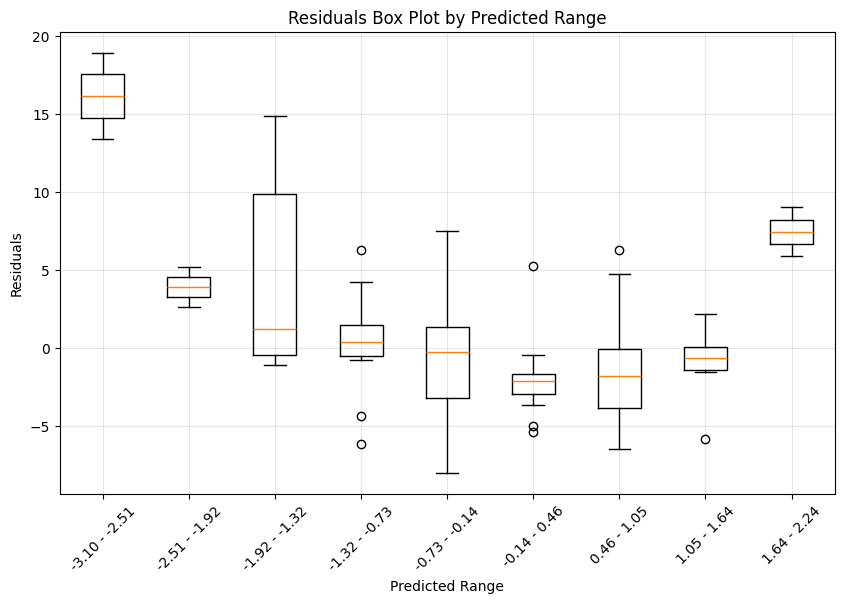

In [ ]:
# Group predictions into bins
bins = np.linspace(y_pred_bayesian.min(), y_pred_bayesian.max(), 10)
bin_indices = np.digitize(y_pred_bayesian, bins)

# Create residuals grouped by bins
residual_groups = [residuals[bin_indices == i] for i in range(1, len(bins))]

# Box plot for residuals in each bin
plt.figure(figsize=(10, 6))
plt.boxplot(residual_groups, labels=[f"{bins[i]:.2f} - {bins[i+1]:.2f}" for i in range(len(bins)-1)])
plt.xlabel("Predicted Range")
plt.ylabel("Residuals")
plt.title("Residuals Box Plot by Predicted Range")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

This box plot shows the errors grouped by predicted value ranges. The yellow line in each box represents the median, or middle value of the errors, showing where most predictions are centered. The size of the box indicates how much the errors vary, with wider boxes meaning more inconsistent predictions. The lines extend to show the overall spread, while dots outside the whiskers are outliers, showing predictions that are far off. The plot highlights the model's performance across different predicted ranges. Tighter distributions in some intervals (e.g., -0.14 to -0.46) demonstrate stable and consistent predictions, while wider spreads (e.g., -1.92 to -1.32) and occasional outliers indicate areas where the model could be refined.

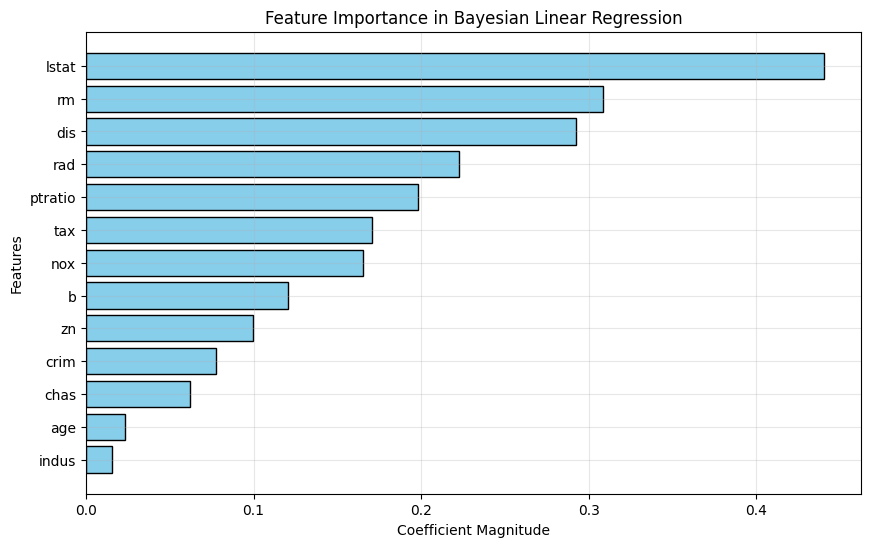

In [ ]:
# Extract feature importance (absolute values of coefficients)
feature_importance = np.abs(bayesian_model.coef_)

# Assume feature names are available (replace 'feature_names' with actual names if known)
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i+1}" for i in range(len(feature_importance))]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.title("Feature Importance in Bayesian Linear Regression")
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.grid(alpha=0.3)
plt.show()

This chart shows the feature importance in Bayesian Linear Regression, where the importance is represented by the magnitude of the coefficients. This analysis helps in understanding which variables impact the predictions most significantly.

###Section-6.3: Result Analysis of MLE, MAP and BLR

In this section, we analyze the performance of three estimation methods—Maximum Likelihood Estimation (MLE), Maximum A Posteriori (MAP), and Bayesian Linear Regression (BLR)—on the house prediction dataset. The evaluation focuses on two performance metrics: Mean Squared Error (MSE) and R-Squared Score.

In [ ]:
methods = ['MLE', 'MAP', 'BLR']
x = np.arange(len(methods))  # Convert categorical values to numerical indices
mse = [0.2866, 0.2366, 0.2353]
r2 = [0.6613, 0.7204, 0.7219]

# Generate curves using spline interpolation
x_smooth = np.linspace(x.min(), x.max(), 300)

# MSE plot
mse_spline = make_interp_spline(x, mse, k=2)(x_smooth)

# R^2 Score plot
r2_spline = make_interp_spline(x, r2, k=2)(x_smooth)

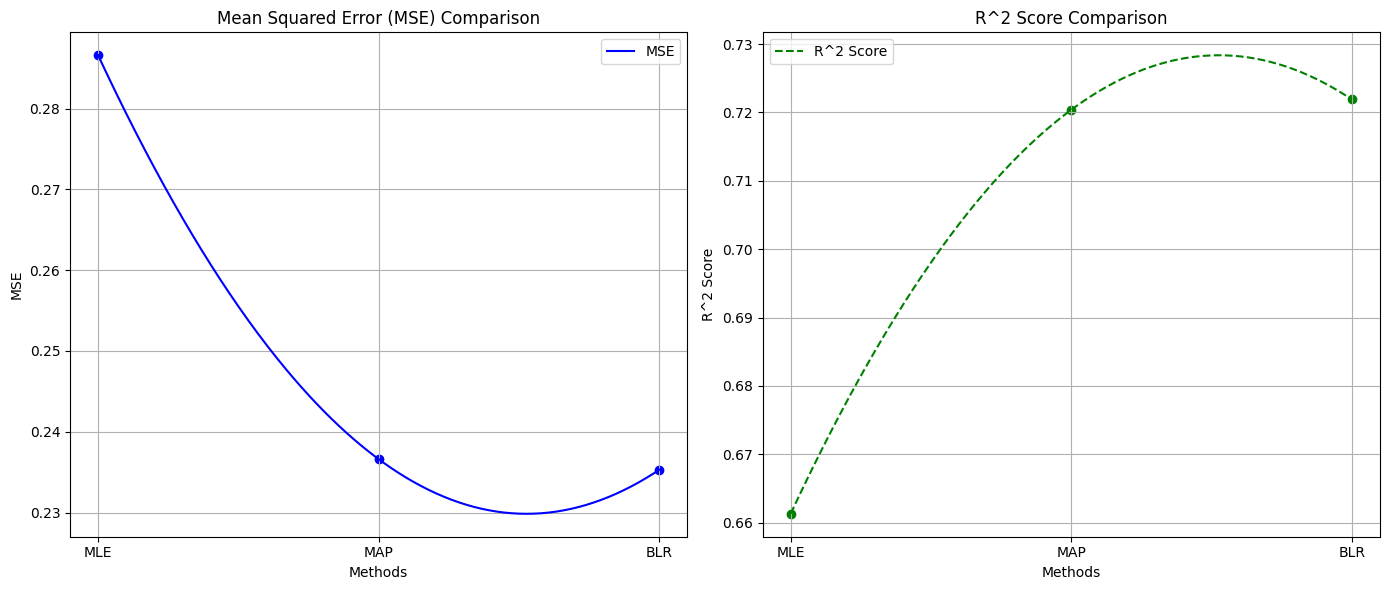

In [ ]:
# Plot size
plt.figure(figsize=(14, 6))

# Subplot 1: Mean Squared Error (MSE)
plt.subplot(1, 2, 1)
plt.plot(x_smooth, mse_spline, label='MSE', color='blue')
plt.scatter(x, mse, color='blue')  # Mark actual data points
plt.xticks(x, methods)
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Methods')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()

# Subplot 2: R^2 Score
plt.subplot(1, 2, 2)
plt.plot(x_smooth, r2_spline, label='R^2 Score', linestyle='--', color='green')
plt.scatter(x, r2, color='green')  # Mark actual data points
plt.xticks(x, methods)
plt.title('R^2 Score Comparison')
plt.xlabel('Methods')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.legend()


plt.tight_layout() # Adjust spacing
plt.show()

The analysis shows improvement in performance as we move from MLE to MAP and then to BLR, with MSE decreasing and $R^2$ score increasing. This highlights how the models evolve to provide better estimates.

BLR does better than MLE and MAP because it models uncertainty and defines the full probability of the data and predictions. MLE only finds the most likely parameters, and MAP uses fixed priors, but BLR combines prior knowledge with observed data dynamically. This helps BLR make better predictions and give uncertainty estimates, which is very useful in real-world cases. However, BLR is slower to compute and needs good priors, as bad ones can affect the results.

##Section-07: Classification using Regression: Logistic Regression

In Maximum Likelihood Estimation (MLE), we define the objective function as:

$$\min_{\beta_0, \beta_1} \sum_{i=1}^{n} \left( y_i - (\beta_0 + \beta_1 x_i) \right)^2$$

This works well for continuous outcomes but not for classification, as probabilities must be bounded between 0 and 1. Logistic regression solves this by modeling probabilities directly using a sigmoid function:

$$P(y=1 \mid x;\theta) = \sigma(\theta^Tx) = \frac{1}{1 + e^{-\theta^T x}}$$

Here, $\theta$ represents the model parameters, x is the feature vector and $\sigma(z)=\frac{1}{1+e^{-z}}$ ensure the probability output is bounded between 0 to 1. Thus instead of minimizing squared errors, logistic regression uses the log-likelihood function, as probabilities are modeled directly. For y $\in$ {0,1}, the likelihood of observing y is:

$$P(y \mid x; \theta) =\begin{cases} \sigma(\theta^T x) & \text{if } y = 1 \\
1 - \sigma(\theta^T x) & \text{if } y = 0\end{cases}$$

This can be compactly written as:

$$P(y \mid x;\theta) = \sigma(\theta^Tx)^y(1-\sigma(\theta^Tx))^{1-y}$$

To estimate the parameters $\theta$, we maximize the log-likelihood for all samples:

$$\ell(\theta) = \sum_{i=1}^n \left[ y_i \log(\sigma(\theta^T x_i)) + (1 - y_i) \log(1 - \sigma(\theta^T x_i)) \right]$$

This loss function is also known as cross-entropy loss. This expression represents the sum of the log-probabilities for each prediction. Maximizing the log-likelihood is equivalent to minimizing the negative log-likelihood:

$$\min_{\theta}  -\ell(\theta) = \sum_{i=1}^n \left[ y_i \log(\sigma(\theta^T x_i)) + (1 - y_i) \log(1 - \sigma(\theta^T x_i)) \right]$$

This is the objective function for logistic regression, and it is solved using optimization algorithms like gradient descent. Once $\theta$ is estimated, the model predicts class probabilities using the sigmoid function. For classification, we apply a threshold (commonly 0.5):

$$\hat{y} =\begin{cases} 1 & \text{if } P(y=1 \mid x; \theta) \geq 0.5 \\
0 & \text{otherwise} \end{cases}$$

This process enables logistic regression to classify data points while ensuring outputs are valid probabilities.

###Section-7.1: Titanic- Predict survival on the Titanic

In this section, we will explore classification via regression through an application. For this we will use Titanic - Machine Learning from Disaster [8].

**Problem Context:** The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there were not enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this problem, the objective is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (i.e: name, age, gender, socio-economic class, etc).

In [ ]:
!wget "#Titanic Train Path" -O train.csv
!wget "#Titanic Test Path" -O test.csv
!wget "#Titanic Test Label Path" -O test_label.csv

--2024-11-24 15:22:44--  https://drive.google.com/uc?export=download&id=1AYbIfgM5n2rg9aKRmmpO7hpJ5y6MtfrI
Resolving drive.google.com (drive.google.com)... 64.233.180.102, 64.233.180.139, 64.233.180.100, ...
Connecting to drive.google.com (drive.google.com)|64.233.180.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1AYbIfgM5n2rg9aKRmmpO7hpJ5y6MtfrI&export=download [following]
--2024-11-24 15:22:44--  https://drive.usercontent.google.com/download?id=1AYbIfgM5n2rg9aKRmmpO7hpJ5y6MtfrI&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [application/octet-stream]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in

The commands download three files: train.csv for training data, test.csv for test features, and test_label.csv for test set labels. These files are saved locally, providing all the data needed for training and evaluating the model. Later, they are converted to dataframe using panda library.

In [ ]:
# Load data from the uploaded files
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
test_label = pd.read_csv('/content/test_label.csv')

###Section-7.2: Preprocessing The Dataset

For this application , we will use 4 attributes to train our model,
pclass:	Ticket class of the passenger (1 = 1st, 2 = 2nd, 3 = 3rd)

sex:	Sex of the passenger

Age: Age (years)

fare: Passenger fare

The target variable is survival where 0 = did not survived, 1 = survived

In [ ]:
# Select relevant columns from training data
X_train = train_data[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = train_data['Survived']

# Preprocess the test data
X_test = test_data[['Pclass', 'Sex', 'Age', 'Fare']]
y_test = test_label['Survived']

In most real-life datasets, it's common to encounter missing values due to various reasons, such as incomplete data collection, system errors, or human oversight. Missing values can negatively impact the performance of machine learning models by introducing bias or reducing the effectiveness of the model’s training process. Now, we will check how many missing data our dataset has.

In [ ]:
print(X_test.isna().sum())

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64


The dataset has 86 missing values in the Age column and 1 missing value in the Fare column. Handling these gaps is important to ensure the model remains accurate and reliable. To address this, we use separate imputers for Age and Fare, both configured to replace missing values with the median. This method is especially effective for dealing with outliers and ensures that the data is complete and ready for training.

In [ ]:
# Create separate imputers for Age and Fare
age_imputer = SimpleImputer(strategy='median')
fare_imputer = SimpleImputer(strategy='median')

# Impute 'Age'
X_train.loc[:, 'Age'] = age_imputer.fit_transform(X_train[['Age']])
X_test.loc[:, 'Age'] = age_imputer.transform(X_test[['Age']])

# Impute 'Fare'
X_train.loc[:, 'Fare'] = fare_imputer.fit_transform(X_train[['Fare']])
X_test.loc[:, 'Fare'] = fare_imputer.transform(X_test[['Fare']])

We are converting the Sex and Pclass columns into numerical values using one-hot encoding. Machine learning models work with numerical data, so this step is essential for handling categorical variables. The OneHotEncoder creates separate columns for each category, making it easier for the model to interpret the data. To avoid redundancy, we drop the first category from each feature. This not only simplifies the data but also prevents issues like multicollinearity ((when features are highly correlated with each other). The transformed columns are then added to the training and test datasets, replacing the original categorical values.

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
train_encoded = pd.DataFrame(encoder.fit_transform(X_train[['Sex', 'Pclass']]),
                             columns=encoder.get_feature_names_out(['Sex', 'Pclass']))
test_encoded = pd.DataFrame(encoder.transform(X_test[['Sex', 'Pclass']]),
                            columns=encoder.get_feature_names_out(['Sex', 'Pclass']))

In [ ]:
X_train = pd.concat([X_train[['Age', 'Fare']], train_encoded], axis=1)
X_test = pd.concat([X_test[['Age', 'Fare']], test_encoded], axis=1)

In [ ]:
X_train
X_test

,Age,Fare,Sex_male,Pclass_2,Pclass_3
0,34.5,7.8292,1.0,0.0,1.0
1,47.0,7.0000,0.0,0.0,1.0
2,62.0,9.6875,1.0,1.0,0.0
3,27.0,8.6625,1.0,0.0,1.0
4,22.0,12.2875,0.0,0.0,1.0
...,...,...,...,...,...
413,28.0,8.0500,1.0,0.0,1.0
414,39.0,108.9000,0.0,0.0,0.0
415,38.5,7.2500,1.0,0.0,1.0
416,28.0,8.0500,1.0,0.0,1.0


The correlation heatmap between different features and the target variable, will highlight their influence on the outcome. Correlation values range from -1 to 1, where positive values mean a direct relationship with the target, and negative values suggest an inverse relationship.

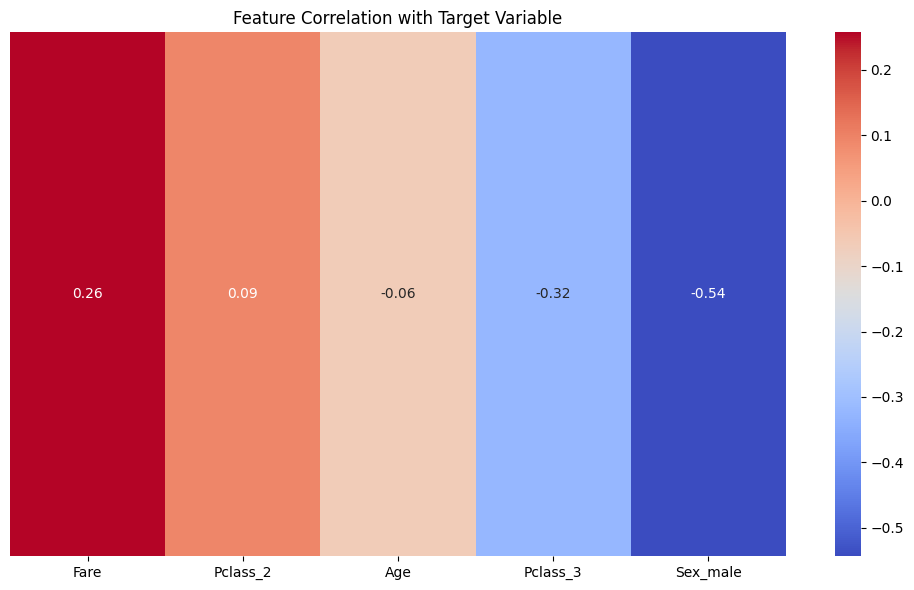

In [ ]:
correlation = X_train.corrwith(y_train)

# Compute correlation and format for heatmap
correlation_df = correlation.sort_values(ascending=False).reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df[['Correlation']].T, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=correlation_df['Feature'])
plt.title('Feature Correlation with Target Variable')
plt.yticks([])
plt.tight_layout()
plt.show()

 In real life, higher Fare values and upper-class tickets (Pclass_2) and lower-class tickets (Pclass_3) indicate that wealthier individuals, who had better access to resources like lifeboats, were more likely to survive. The strong negative correlation for Sex_male reflects how women and children were prioritized for the limited lifeboats under the “women and children first” practice.

 Additionally, the weak negative correlation for Age suggests that older individuals were less likely to survive, possibly due to physical challenges in reaching safety or being deprioritized in rescue efforts. These correlations align closely with real-life survival patterns observed during the event.

In [ ]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We normalize the features using StandardScaler to standardize them, ensuring the values are between 0 and 1. Normalizing is important because it increases the stability of machine learning algorithms, especially those sensitive to feature scaling, like logistic regression. It also reduces the dominance of features with larger values, ensuring that all features contribute equally to the model, rather than allowing one with higher magnitude to overshadow others. This leads to improved training efficiency and more reliable results.

###Section-7.3: Model Setup and Prediction

The logistic regression model is set to run with 1000 iterations to ensure the optimization algorithm converges. A random state of 42 is used to control the randomness in processes like weight initialization, ensuring consistent and reproducible results every time the code is executed. Then, the model will be used to make predictions on the test set using the scaled features. These predictions represent the model’s classification of the target variable based on the patterns it learned during training.

In [ ]:
# Train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

We will now use the trained logistic regression model for the test set. The predict method takes the scaled test features (X_test_scaled) and generates predicted class labels based on the learned model parameters. These predictions will be used for evaluation or further analysis.

In [ ]:
# Predict on the test set
test_predictions = logistic_model.predict(X_test_scaled)

###Section-7.4: Model Evaluation and Performance Analysis

In this section, I present an analysis of the model's performance using various evaluation metrics. The results highlight the effectiveness of the model and provide insights into its predictive capabilities on the test dataset.

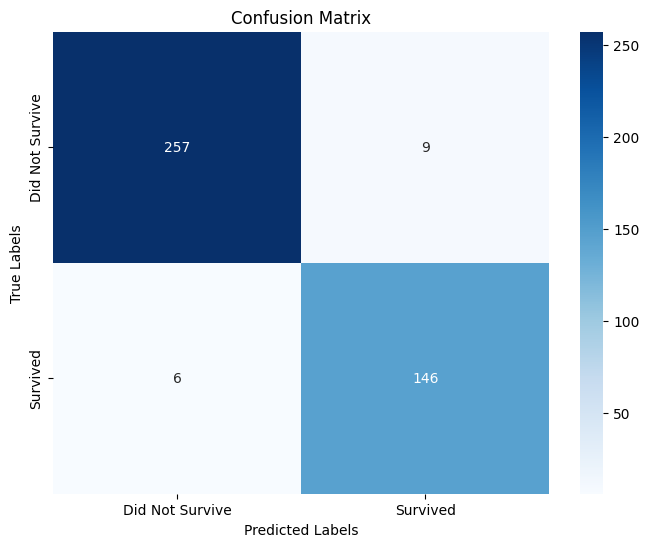

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The confusion matrix highlights the strong performance of the model on the test set. It correctly predicted 257 instances as "Did Not Survive" and 146 instances as "Survived," with only 9 false positives and 6 false negatives. This demonstrates the model's ability to classify the majority of cases accurately while leaving room for further refinement to address a small number of misclassifications. Overall, the results are excellent and reflect the model’s reliability.

In [ ]:
print("Classification Report:\n")
class_report = classification_report(y_test, test_predictions, target_names=['Did Not Survive', 'Survived'])
print(class_report)

Classification Report:

                 precision    recall  f1-score   support

Did Not Survive       0.98      0.97      0.97       266
       Survived       0.94      0.96      0.95       152

       accuracy                           0.96       418
      macro avg       0.96      0.96      0.96       418
   weighted avg       0.96      0.96      0.96       418



The classification report provides a detailed evaluation of the model's performance using key metrics:

*   **Precision:** This measures how many of the predicted positive cases are actually positive. High precision means fewer false positives. For example, precision for "Survived" is 0.94, indicating 94% of predicted survivors were correct.
*   **Recall:** This indicates how many of the actual positive cases the model
successfully identified. High recall means fewer false negatives. For "Survived" recall is 0.96, meaning the model captured 96% of actual survivors.
*   F1-Score: The harmonic mean of precision and recall, balancing both metrics. It's particularly useful when classes are imbalanced. For "Survived" the F1-score is 0.95, showing a strong balance between precision and recall.

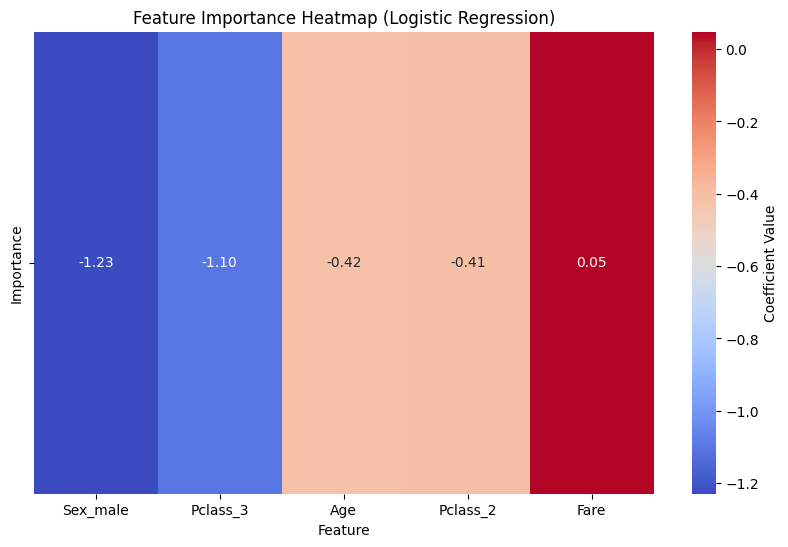

In [ ]:
# Extract feature names before scaling
feature_names = X_train.columns  # Use the original column names

# Get coefficients from the logistic regression model
coefficients = logistic_model.coef_[0]

# Combine feature names with coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
}).sort_values(by='Importance', key=abs, ascending=False)
# Create a heatmap-friendly DataFrame
heatmap_data = feature_importance.set_index('Feature')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data.T,  # Transpose to align features on the x-axis
    cmap='coolwarm',  # Color scheme
    annot=True,       # Annotate values on the heatmap
    fmt='.2f',        # Format annotations
    cbar_kws={'label': 'Coefficient Value'}  # Label for the color bar
)
plt.title('Feature Importance Heatmap (Logistic Regression)')
plt.xlabel('Feature')
plt.ylabel('')
plt.show()

This heatmap illustrates the importance of each feature in the logistic regression model based on their coefficient values. Features like Sex_male (-1.23) and Pclass_3 (-1.10) have strong negative coefficients, indicating they significantly decrease the likelihood of the target outcome. On the other hand, Fare (0.05) has a positive but weaker impact, suggesting that higher fares slightly increase the likelihood of survival. The values help us understand how each feature influences the model's predictions.

##Section-08: Conclusion

In this project, we explored various regression techniques, beginning with Maximum Likelihood Estimation (MLE), which relies solely on data to predict parameters. While MLE is a straightforward approach, it is prone to overfitting, particularly with small or noisy datasets. To address this limitation, we next examined Maximum A Posteriori (MAP), which incorporates prior beliefs alongside data. These prior beliefs act as regularization terms, preventing extreme parameter value changes and improving model robustness.

Building on MAP, Bayesian Linear Regression (BLR) introduced uncertainty estimation into parameter predictions, enhancing interpretability and reliability. A comparison of these methods showed a significant improvement in model performance when moving from MLE to MAP, with the $R^2$ score increasing from 0.6613 to 0.7204. BLR further increased the $R^2$ score to 0.7219, demonstrating its robustness and capacity to handle uncertainty effectively.

Finally, we explored classification through logistic regression, which enabled binary classification while additionally providing insights into the factors influencing model performance. For instance, in the Titanic survival prediction, being female, of a younger age, or holding a better ticket class significantly increased the likelihood of survival, highlighting the model's interpretive capability.

In conclusion, this project demonstrated the strengths and limitations of different regression techniques. We also explored the importance of incorporating prior belief and uncertainity which can make linear regression more robust and efficient. In the final section, we used logistic regression not only for classification but also to interpret a historical event, analyzing factors that influenced survival on the Titanic. Overall, this project highlights the versatility and power of regression and classification techniques in uncovering patterns, making predictions, and providing actionable insights in diverse data-driven applications.

##Reference:

01. Jangir, A. (2023). Boston Housing dataset. Kaggle.
Retrieved from https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset/data

02. Moroney, L. (2020). AI and Machine Learning for Coders: A Programmer's Guide to Artificial Intelligence. O'Reilly Media.

03. Barocas, S., Hardt, M., & Narayanan, A. (2023). Fairness and Machine Learning: Limitations and Opportunities. Retrieved from https://fairmlbook.org/

04. Hossain, E. (2023). Teaching materials. GitHub. Retrieved from https://github.com/eftekhar-hossain/Teaching/tree/main

05. Deisenroth, M. P., Faisal, A. A., & Ong, C. S. (2020). Mathematics for Machine Learning (pp. 317-347). Cambridge University Press. Retrieved from https://mml-book.github.io/book/mml-book.pdf

06. Dutta, P. (2021). Lecture 2: Machine Learning Week 1 [PDF]. GitHub. Retrieved from https://github.com/PramitDutta1999/Machine-Learning/blob/main/Week-1/Lecture2.pdf

07. Hastie, T. (2020). Ridge Regularization: An Essential Concept in Data Science. Retrieved from https://pmc.ncbi.nlm.nih.gov/articles/PMC9410599/

08. Kaggle. (2012). Titanic - Machine Learning from Disaster dataset. Retrieved from https://www.kaggle.com/c/titanic/data